<a href="https://colab.research.google.com/github/adnannasirsyed/ML_projects/blob/main/Project_Personal_Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 73.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 70.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 70.1 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.1 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
xarray 2025.1.2 requires pandas>=2.1, but you have pandas 1.5.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0,

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

The Notebook Kernel was restarted from the "Runtime" drop down

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
)

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading the CSV file into a variable
bank_customer_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Loan_Modelling.csv")

In [ ]:
# copying data to another variable to avoid any changes to original data
data = bank_customer_data.copy()

## Data Overview

View the first and last 5 rows of the dataset.

In [ ]:
# Viewing the first 5 rows
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
# Viewing the last 5 rows
data.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


Observations:
* There are 14 attributes all together.
* The attribute "ID" has all unique values, hence, there will not be any pattern that could be determine, and will not be used in classification problem and can be ommitted.
* The column "ZIPCode" can be translated into proper cities and zones, this can help in determining the areas from where the customers belong to.
* The other attributes (Age, Experience, Income, ZIPCode, Family, CCAvg, Education, Mortgage, Personal_Loan, Securities_Account, CD_Account, Online, and CreditCard) may have hidden patterns and will be analysed using uni-variate and bi-variate analysis in order to disclose them.

Understand the shape of the dataset.

In [ ]:
# Determining the structure of the data
data.shape

(5000, 14)

The Dataset contains 5000 rows and 14 coulmns.

Check the data types of the columns for the dataset.

In [ ]:
# Checking the Dateset's input types and to see if null values exists
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


* All the attributes found were "Numerical" either int64 or float64
* There were no null values as all the columns shows 5000 rows

#### Checking for missing values to make sure there are no Null Values

In [ ]:
# checking for null values
data.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


No Missing values were detected in any column

Dropping the duplicate values

In [ ]:
# checking for duplicate values
data.duplicated().sum()

np.int64(0)

There are no duplicates in the entire Dataset

## Dropping the "ID" Column

In [ ]:
# Checking the ID Column for unique values
data.ID.nunique()

5000

As determined before, there are 5000 unique values, hence no patterns can be determined through this information. Next drop this column

In [ ]:
# Dropping the "ID" Column
data = data.drop(["ID"], axis=1)

In [ ]:
# Verifying the dropped column by viewing the first 5 rows
data.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


The "ID" Columns was dropped and now there are 13 attributes remaining.

## Statistical summary of the data

In [ ]:
# describe function is used to derive statistical top level analysis like mean,
# standard deviation, median, quartiles, count and minimum and max values of the dtaset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


* Key Observations
  1. Age: Ranges from 23 to 67, average approximately 45 years.
  2. Experience: Min is negative (-3), indicating possible data error needing investigation.
  3. Income: Ranges significantly from \$8k to \$224k, mean approximately \$74k.
  4. Family feature shows that on average customers have 2.3 family members.
  5. CCAvg feature shows customers have minimum 0 and maximum 10 credit cards.
  6. Education is a categorical feature with 3 classes.
  7. Mortgage: Many customers have no mortgage (median=0), maximum mortgage value is significant (\$635k).
  8. Personal Loan: Taget Feature with binary attribute, with mean=0.096 suggesting roughly 9.6% of customers accepted the loan.
  9. Securities_Account is also a binary feature, either yes or no values.
  10. CD_Account, another binary feature.
  11. Online Banking: Nearly 60% of customers use online banking.
  12. CreditCard is also a binary feature.
* Sanity checks
  1.  Investigation on "negative" experience values is needed. These are most likely data errors.
  2.  After dropping the "ID" column, the overall dataset has no missing values, no duplicates, and data seems to be consistent.
  3. Zipcodes needed to be converted to cities to make sense.



## Treating Negative Values in "Experience"

In [ ]:
# Find all rows that are Negative in attribute "Experience"
negative_experience = data[data['Experience'] < 0]
negative_experience

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
89,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


In [ ]:
# The number of Negative Values
count_negative_experience = negative_experience.shape[0]
count_negative_experience

52

* There are 52 Negative Values in the attribute "Experience"
* These 52 values can either be dropped (if they are far and apart and makes no sense).
* These 52 values can also be retained, if they make sense and don't sway a lot.
* Another way may be to replace/imterpolate these values with mean or medians.
* If these values makes sense, then it may be that the data was entered with a negative sign by mistake, in this case we can just take the absolute of these values. But first lets see if they make any sense?

In [ ]:
# Finding the minimum negative value
minimum_neg_value = min(negative_experience["Experience"])
minimum_neg_value

-3

The minimum value of the negative experience is -3

In [ ]:
# Finding the maximum negative value
maximum_neg_value = max(negative_experience["Experience"])
maximum_neg_value

-1

The maximum negative value is -1, they don't sway a lot and makes sense (may be the users put a negative sign by mistake) we can safely take the absolute values of Experience attribute

In [ ]:
# Taking absolute values of the attribute "Experience"
data["Experience"] = data["Experience"].abs()
data.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
# Checking for negatives again
negative_experience = data[data['Experience'] < 0]
count_negative_experience = negative_experience.shape[0]
count_negative_experience

0

No Negative Values are found

In [ ]:
# Checking Statistics again
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


The Attribute "Experience" has mean of about 20 years, minimum of 0 years of experience and maximum of 43 years of experience, it seems consistent.

## Dealing with Zipcodes

* Here we are first going to convert the zipcodes to their coressponding cities and check if that makes any sense

In [ ]:
# Installing PyPI uszipcode package to translate the codes to locations
!pip install --upgrade sqlalchemy_mate==2.0.0.0
!pip install uszipcode
#from uszipcode import SearchEngine

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 4.3 MB/s eta 0:00:00
  Created wheel for atomicwrites: filename=atomicwrites-1.4.1-py2.py3-none-any.whl size=6941 sha256=f5cb96eb84741c55ac08fe2acfea9b77c84d8d06df7f2ab1f2818e9f77ed7dff
  Stored in directory: /root/.cache/pip/wheels/f7/99/9c/d24e98c35f30eba0c367ad1e7888d396d676abb35fe1e7611c
Successfully built atomicwrites


In [ ]:
# Importing necessary libraries
import uszipcode  # library for US zipcodes

# Define a function to extract City names from uszipcode library given the zipcodes
def zco(x):
    search = uszipcode.SearchEngine()
    zipcode_data = search.by_zipcode(x)
    # Check if zipcode_data is not None before accessing the 'city' attribute
    if zipcode_data:
        city = zipcode_data.city
        return city
    else:
        # Return original zip code or a placeholder if city is not found
        return x  # Or return "Unknown" or np.nan

In [ ]:
# Converting zipcodes to cities
data['ZIPCode'] = data['ZIPCode'].apply(zco)
data.head()

Download /root/.uszipcode/simple_db.sqlite from https://github.com/MacHu-GWU/uszipcode-project/releases/download/1.0.1.db/simple_db.sqlite ...
  1.00 MB downloaded ...
  2.00 MB downloaded ...
  3.00 MB downloaded ...
  4.00 MB downloaded ...
  5.00 MB downloaded ...
  6.00 MB downloaded ...
  7.00 MB downloaded ...
  8.00 MB downloaded ...
  9.00 MB downloaded ...
  10.00 MB downloaded ...
  11.00 MB downloaded ...
  Complete!


,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,Pasadena,4,1.6,1,0,0,1,0,0,0
1,45,19,34,Los Angeles,3,1.5,1,0,0,1,0,0,0
2,39,15,11,Berkeley,1,1.0,1,0,0,0,0,0,0
3,35,9,100,San Francisco,1,2.7,2,0,0,0,0,0,0
4,35,8,45,Northridge,4,1.0,2,0,0,0,0,0,1


In [ ]:
# Checking last 5 rows
data.tail()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,29,3,40,Irvine,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,La Jolla,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,Ojai,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,Los Angeles,3,0.5,2,0,0,0,0,1,0
4999,28,4,83,Irvine,3,0.8,1,0,0,0,0,1,1


* Zipcodes were converted to Cities, this may reduce the uniqueness of the dataset.
* Next check how many cities the customers were from.

In [ ]:
# Determining unique cities in Zipcodes
unique_cities = data.ZIPCode.unique()
unique_cities

array(['Pasadena', 'Los Angeles', 'Berkeley', 'San Francisco',
       'Northridge', 'San Diego', 'Claremont', 'Monterey', 'Ojai',
       'Redondo Beach', 'Santa Barbara', 'Belvedere Tiburon', 'Glendora',
       'Santa Clara', 'Capitola', 'Stanford', 'Studio City', 'Daly City',
       'Newbury Park', 'Arcata', 'Santa Cruz', 'Fremont', 'Richmond',
       'Mountain View', 'Huntington Beach', 'Sacramento', 'San Clemente',
       'Davis', 'Redwood City', 'Cupertino', 'Santa Clarita', 'Roseville',
       'Redlands', 'La Jolla', 'Brisbane', 'El Segundo', 'Los Altos',
       'Santa Monica', 'San Luis Obispo', 'Pleasant Hill',
       'Thousand Oaks', 'Rancho Cordova', 'San Jose', 'Reseda', 'Salinas',
       'Cardiff By The Sea', 'Oakland', 'San Rafael', 'Banning',
       'Bakersfield', 'Riverside', 'Rancho Cucamonga', 'Alameda',
       'Palo Alto', 'Livermore', 'Irvine', 'South San Francisco',
       'Emeryville', 'Ridgecrest', 92717, 'Hayward', 'San Gabriel',
       'Santa Ana', 'Loma Linda', 

In [ ]:
# determing count of unique values of Zipcode
len(unique_cities)

248

## Observation
* There are total of 248 unique cities under zipcodes. Using one-hot encoding doesn't make sense as it will explode the dataset with 247 additional columns. That will increase computational cost without giving any significant advantage.  
* It is also to be noted that using zip codes can obscure real geographic patterns and relationships, potentially leading to inaccurate or misleading conclusions.
* Excluding ZIPCode is advisable. As it has a high cardinality with many unique values and limited practical value for classification, which can negatively impact the model by causing overfitting and computational complexity.
* In conclusion: In the problems where we need to understand patterns in human behavior, zip codes may not be the best choice. Instead, we need to focus on data that directly relates to the behavior we are trying to understand like "predict if a liability customer will accept a personal loan".
* As Zipcodes are not helping us in classification of clients, hence, this attribute can be dropped safely.

In [ ]:
# Dropping the Zipcode Attribute
data = data.drop(["ZIPCode"], axis=1)
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


The Feature ZIPCode was dropped

In [ ]:
# Checking statistics again
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD_Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


## Clarified Problem Definition:
* The goal is to predict if a liability customer will accept a personal loan.
* Understanding factors most influential in driving the decision to accept a loan.
* Segmenting customers to target those most likely to convert effectively.

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

### The below functions were defined to carry out the EDA

The following functions were created:
* histogram_boxplot - to plot boxplots and histograms together
* labeled_barplot - to create bar plots labbeled with the percentages
* stacked_barplot - to visualize two variables on one bar stacked on top of each other
* distribution_plot_wrt_target - to visualize distributions with respect to the target such as Personal Load acceptance


In [ ]:
# Function to plot combined Boxplot and Histogram
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(  # creating a figure with two subplots
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# Function to plot stacked bar charts
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
# function to plot distributions wrt target
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

## Univariate Analysis

## # 1. Distribution of 'Mortgage'

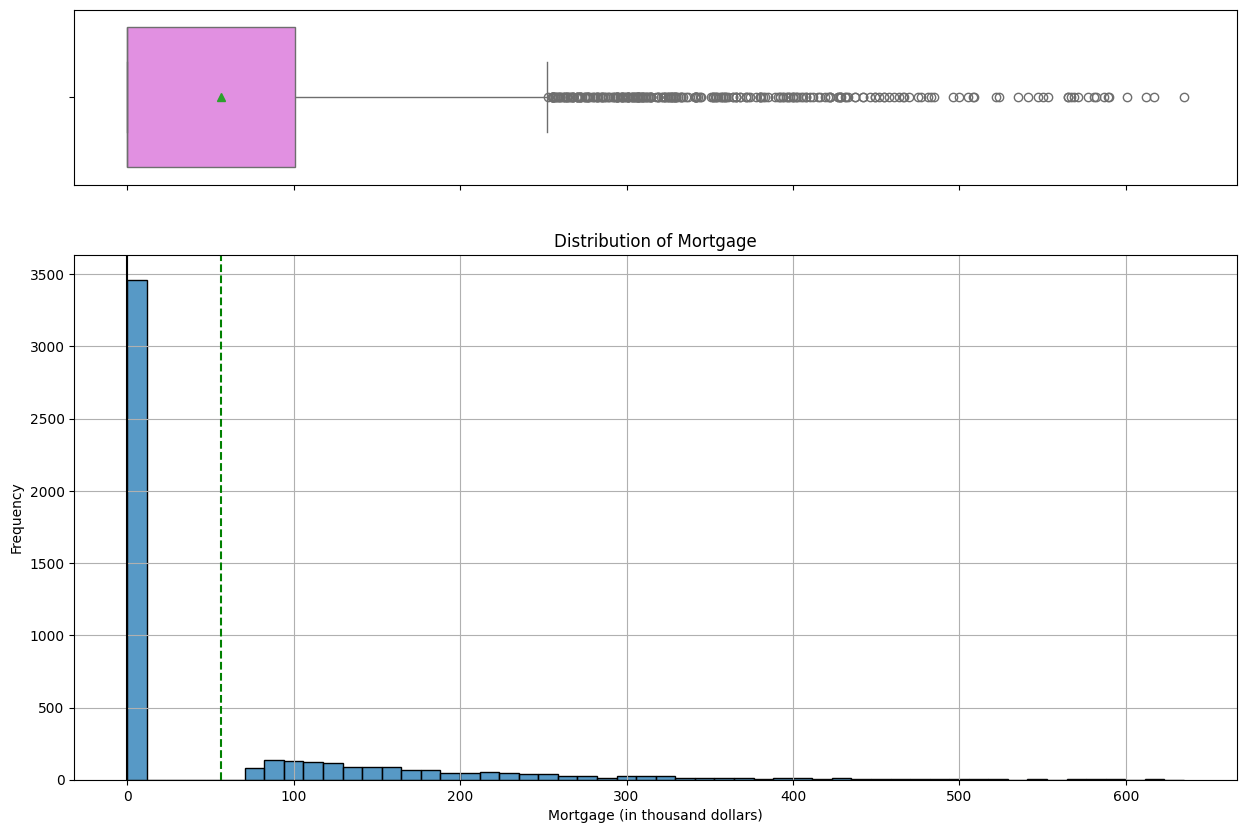

In [ ]:
# Plotting histogram and boxplot
histogram_boxplot(data, "Mortgage")
plt.title('Distribution of Mortgage')
plt.xlabel('Mortgage (in thousand dollars)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Observation:
* Most customers have a mortgage value of 0, indicating many customers either rent their residence or have fully paid mortgages.
* A smaller subset has mortgage values ranging significantly higher, with the distribution highly right-skewed, suggesting some large mortgage outliers (maximum mortgage around \$635,000).
* In conclusion, relationship is highly skewed with significant outliers. Many customers have no mortgage.

## 2. Number of customers having Credit Cards

In [ ]:
# customers with credit cards
credit_card_counts = data['CreditCard'].value_counts()
credit_card_counts

,count
CreditCard,
0,3530
1,1470


# Observation:
* 3530 customers (70.6%) do not have credit cards issued by other banks.
* 1470 customers (29.4%) have credit cards from other banks.

### Analysing "Age" Feature

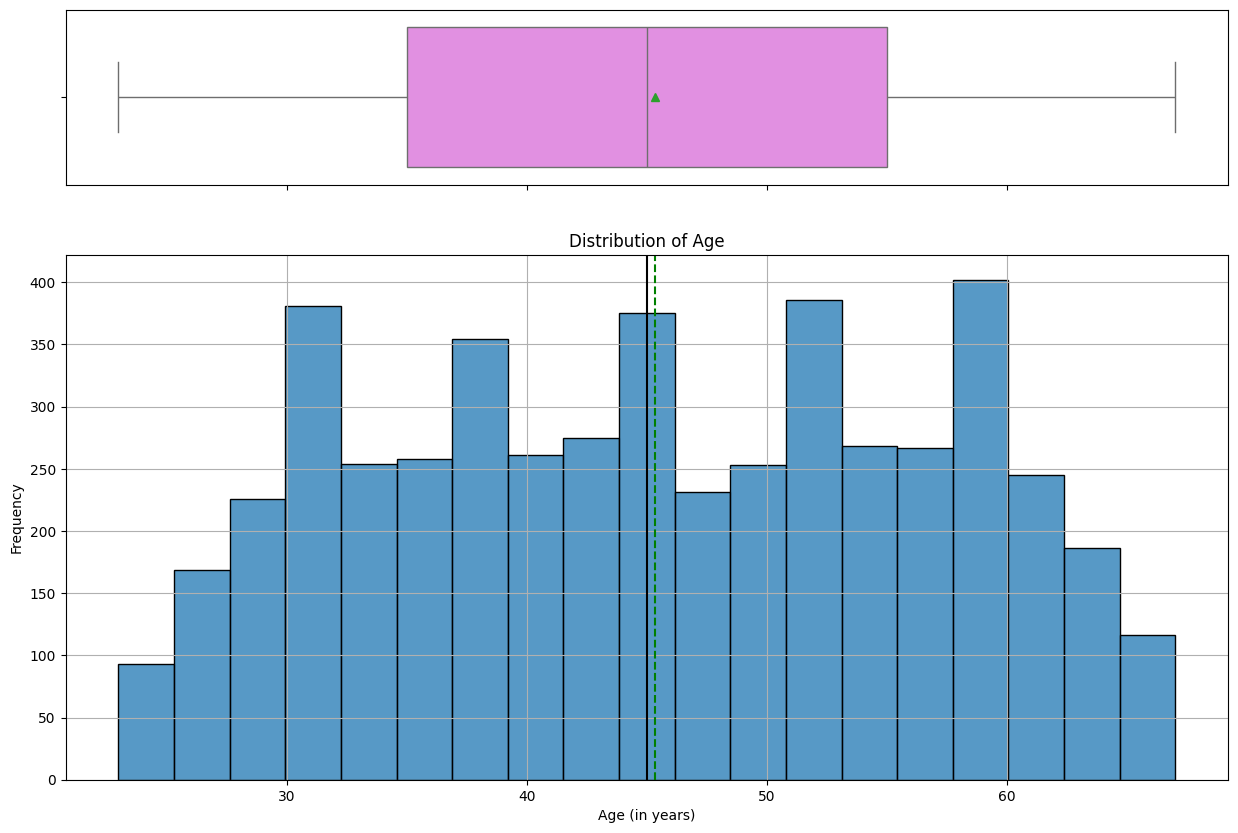

In [ ]:
# Plotting histogram and boxplot for Age
histogram_boxplot(data, "Age")
plt.title('Distribution of Age')
plt.xlabel('Age (in years)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Observation:
* The plot shows no important trend.
* It can be seen here that average age of the customers is about 45 years.


### Analysing "Education"

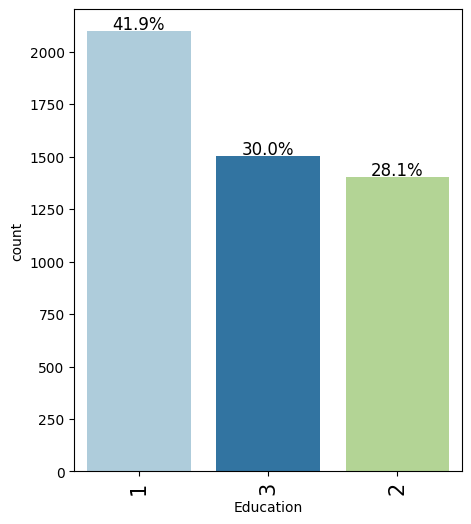

In [ ]:
# Plotting labbeled barplot for Education
labeled_barplot(data, "Education", perc=True)

* There were 41.9% clients having undergraduate qualifications.
* 28.1% of clients have graduate degrees.
* 30% of the clients have advanced professional degrees.

### Visualizing the "Personal_Loan" Feature

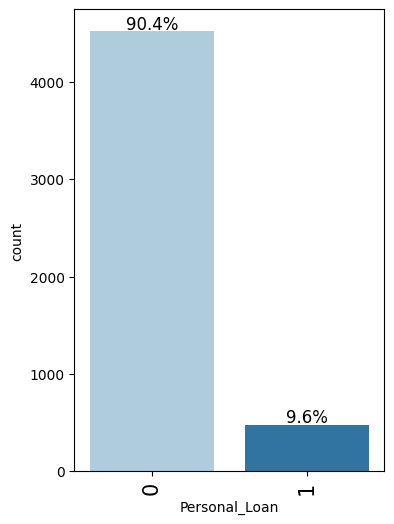

In [ ]:
# Plotting labbeled barplot for Personal Loan
labeled_barplot(data, "Personal_Loan", perc=True)

* 9.6% of the Bank Customers opted to buy the Personal Laon.
* 90.4% didn't opt for the Personal Loan.

### Analysing "Experience"

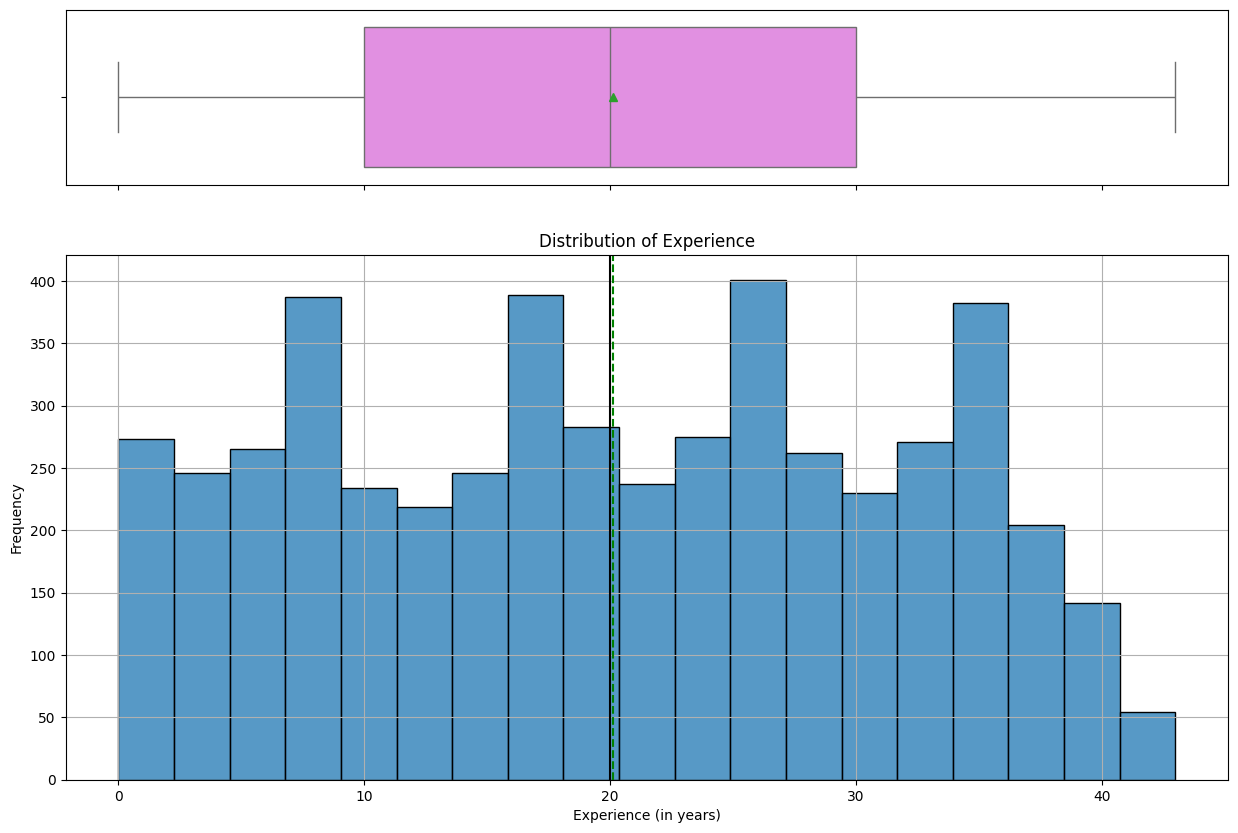

In [ ]:
# Plotting histogram and boxplot for Experience
histogram_boxplot(data, "Experience")
plt.title('Distribution of Experience')
plt.xlabel('Experience (in years)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

* On average customers show a 20 years of experience.
* Distribution has almost no trend.  

### Analysing "Income"

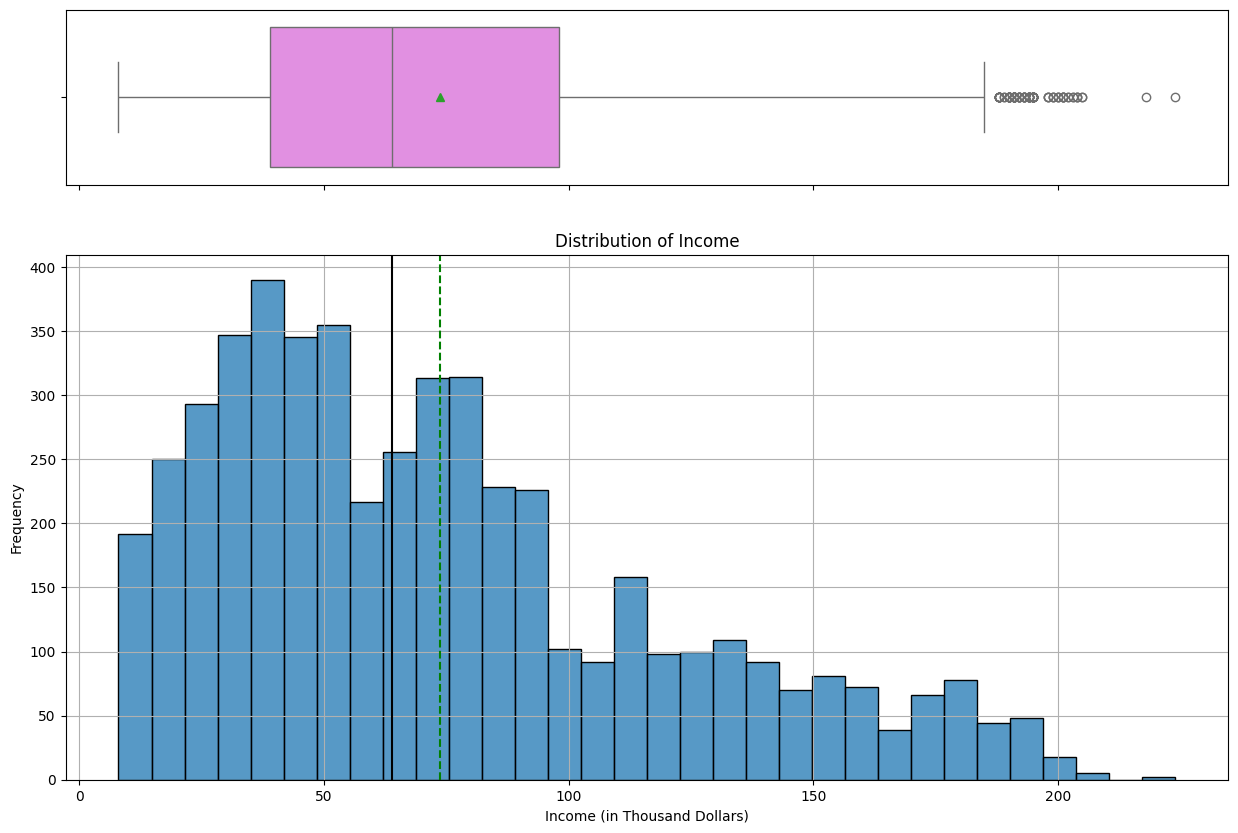

In [ ]:
# Plotting histogram and boxplot for Income
histogram_boxplot(data, "Income")
plt.title('Distribution of Income')
plt.xlabel('Income (in Thousand Dollars)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

* Income is slightly Right Skewed.

### Analysing "Family" Feature

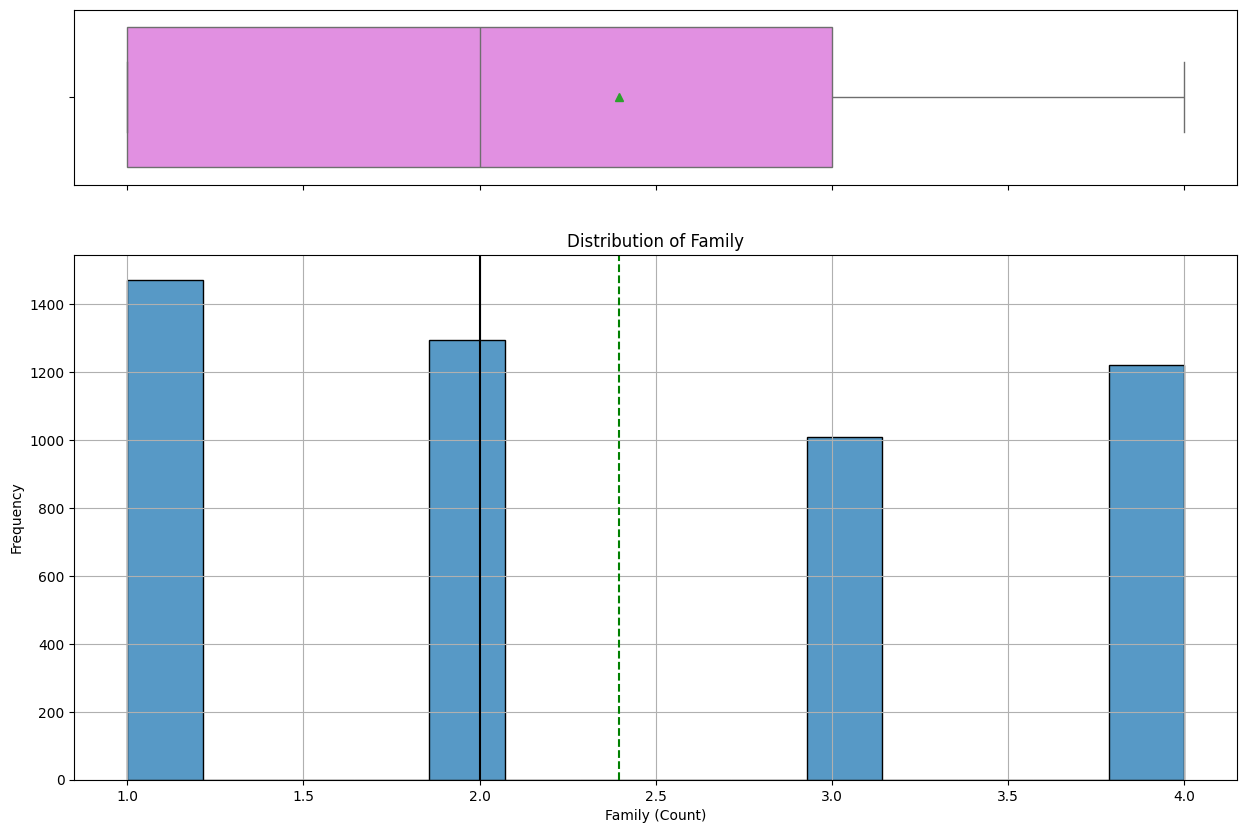

In [ ]:
# Plotting histogram and boxplot for Family
histogram_boxplot(data, "Family")
plt.title('Distribution of Family')
plt.xlabel('Family (Count)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

* There is no distribution trend.

### Analysing "CCAvg" Feature

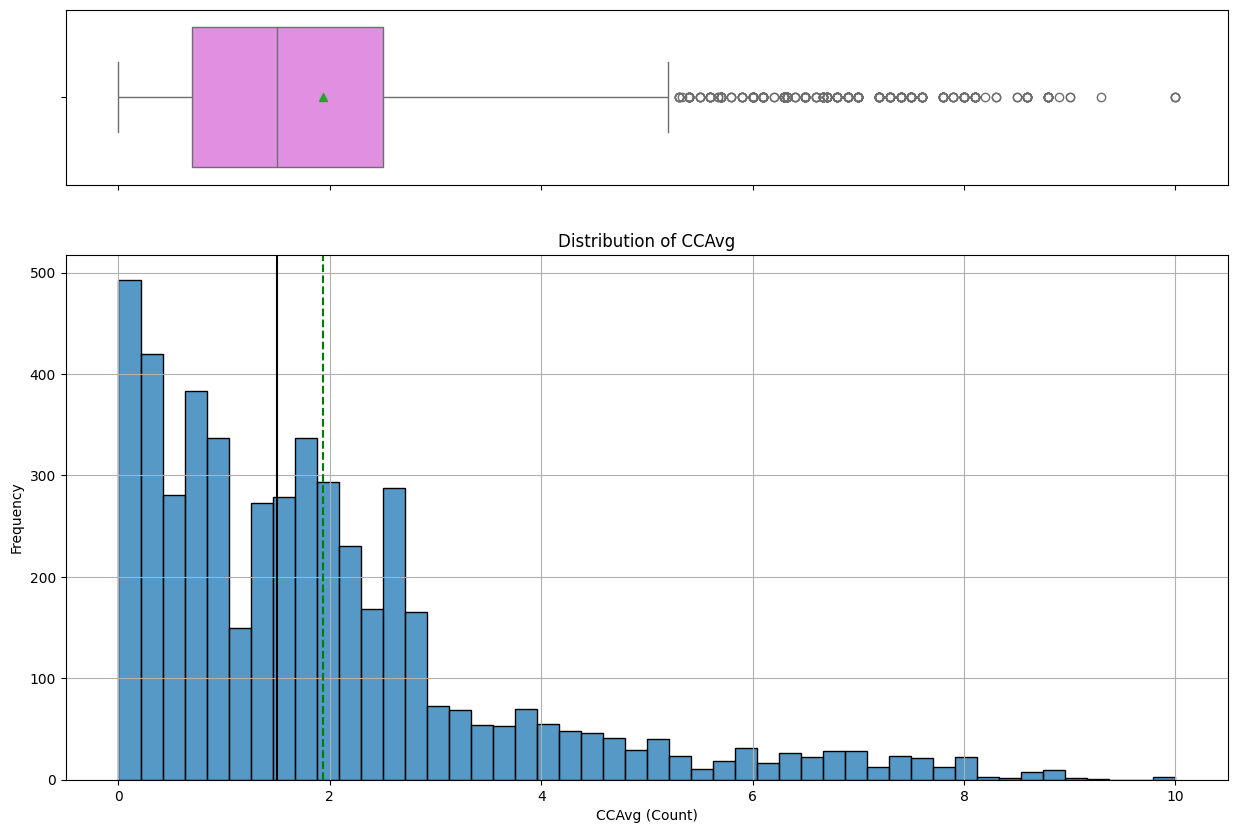

In [ ]:
# Plotting histogram and boxplot for CCAvg
histogram_boxplot(data, "CCAvg")
plt.title('Distribution of CCAvg')
plt.xlabel('CCAvg (Count)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

* This feature is alsi right skewed witha lot of Outliers.

### Analysing "Online" Feature

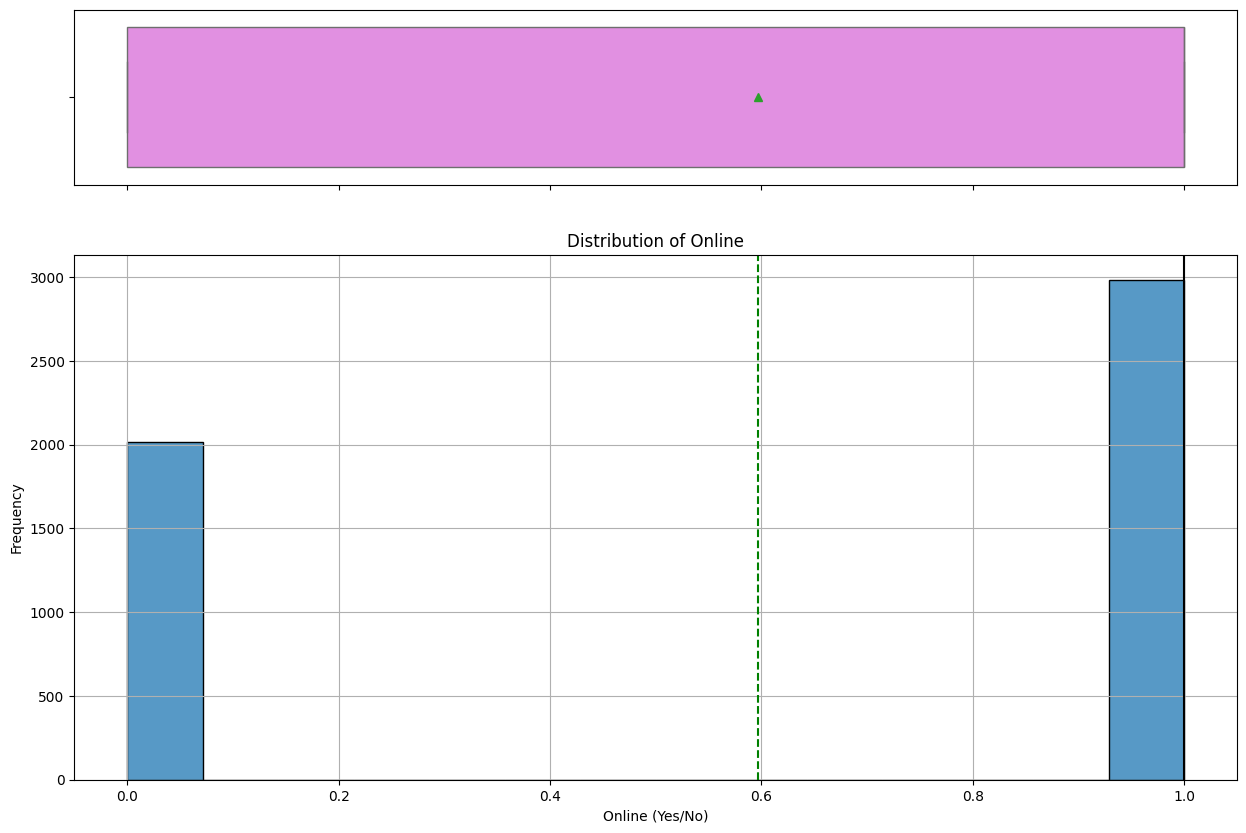

In [ ]:
# Plotting histogram and boxplot for Online
histogram_boxplot(data, "Online")
plt.title('Distribution of Online')
plt.xlabel('Online (Yes/No)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

* Approximately 2000 customers don't use online Services.
* Approximatley 3000 customers use online services.

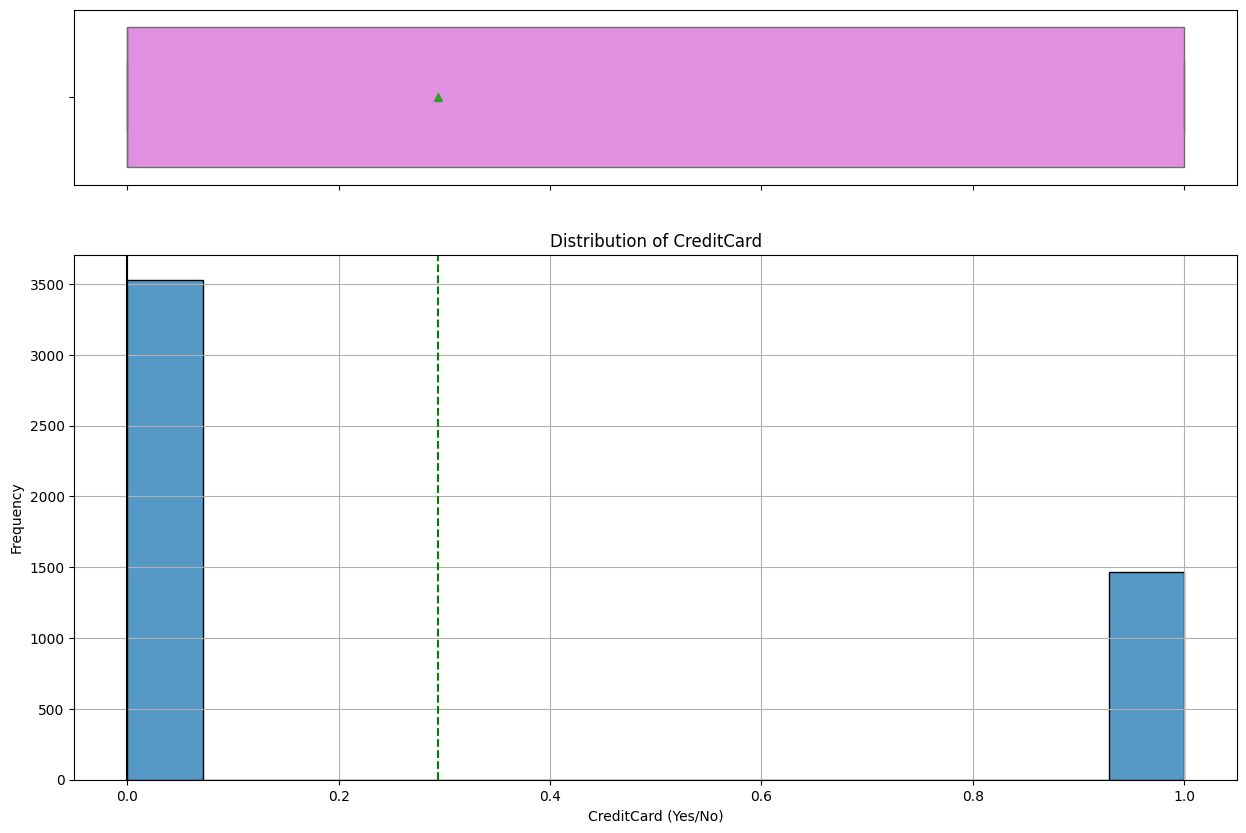

In [ ]:
# Plotting histogram and boxplot for CreditCard
histogram_boxplot(data, "CreditCard")
plt.title('Distribution of CreditCard')
plt.xlabel('CreditCard (Yes/No)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

* Approximately 35000 customers don't have external credit cards.
* Approximately 1500 customers use external credit cards.

## Bivariate Analysis

## 3. Correlation heatmap to find correlations with target variable 'Personal_Loan'

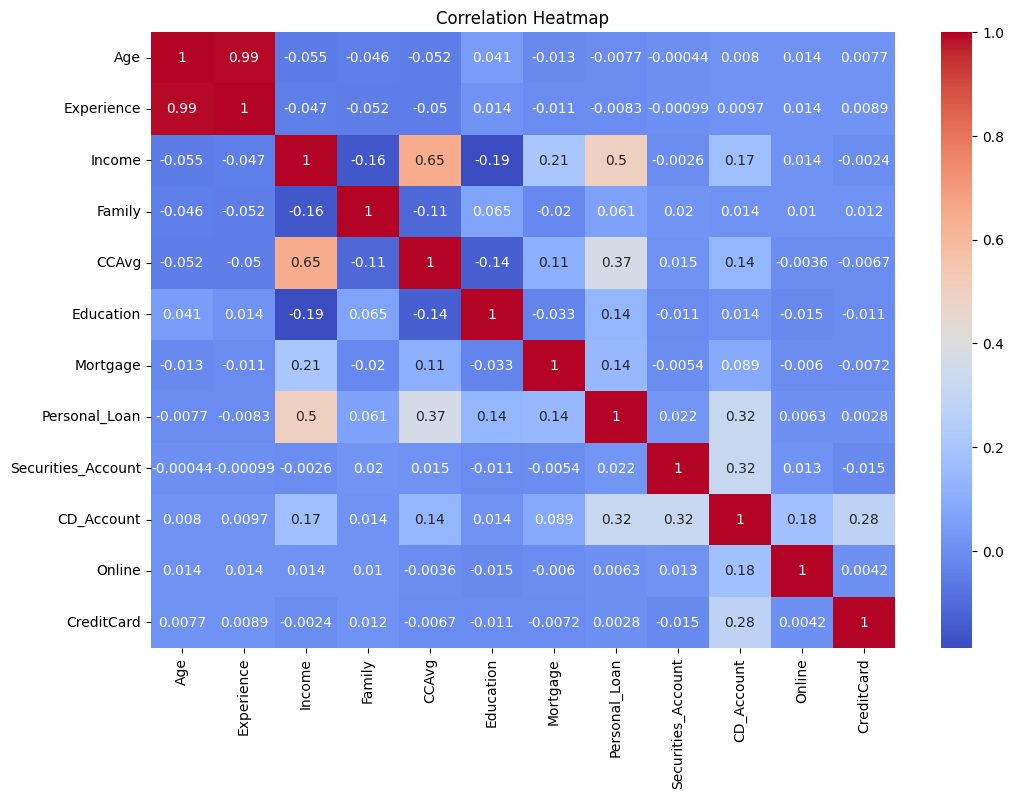

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Observations
* Strong Positive Correlation:
1. Income (0.50), CCAvg (0.37), and Education (0.14) show significant positive correlation with accepting personal loans.
2. CD Account (0.32): Customers with certificate of deposit accounts have a higher likelihood of accepting personal loans.
* Weak or No Correlation: Attributes such as Online, Securities_Account and CreditCard have minimal or negligible correlation with loan acceptance.


## 4. Loan acceptance based on Age

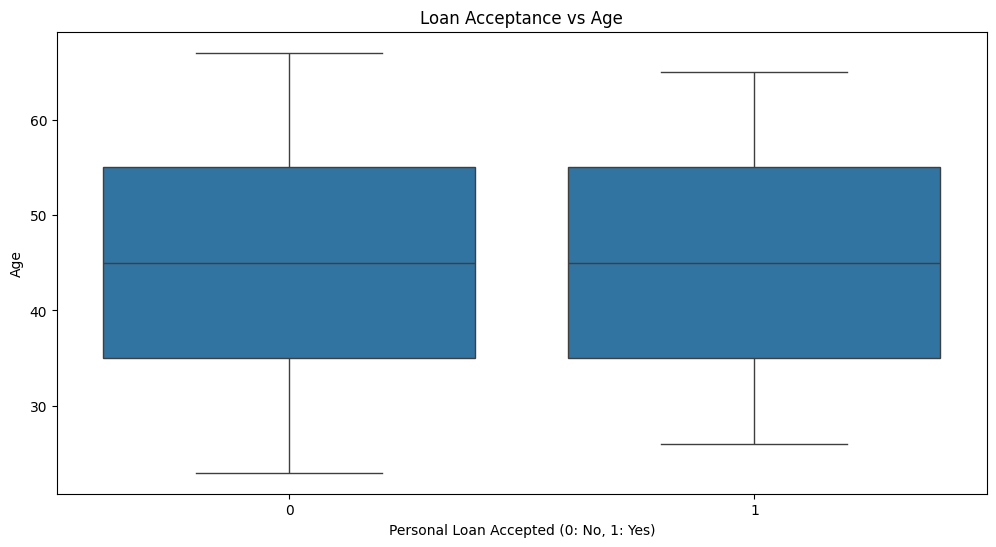

In [ ]:
# Comparing Personal Loans taken vs Age of the customers
plt.figure(figsize=(12, 6))
sns.boxplot(x='Personal_Loan', y='Age', data= data)
plt.title('Loan Acceptance vs Age')
plt.xlabel('Personal Loan Accepted (0: No, 1: Yes)')
plt.ylabel('Age')
plt.show()

# Observation:
* Median age is relatively consistent between those who accepted and those who did not accept loans, though customers accepting loans are marginally younger on average.
* Age alone does not appear as a strong deciding factor, but customers aged around 30-50 years show higher variability in loan acceptance.
* In conclusion, slight variation but not a strong standalone determinant.

## 5. Loan acceptance based on Education

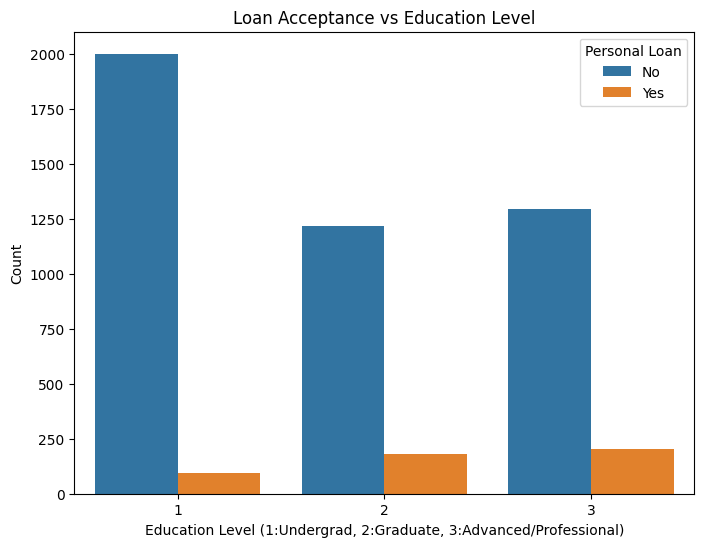

In [ ]:
# Plotting the comparison between Personal Loan and Education
plt.figure(figsize=(8, 6))
sns.countplot(x='Education', hue='Personal_Loan', data=data)
plt.title('Loan Acceptance vs Education Level')
plt.xlabel('Education Level (1:Undergrad, 2:Graduate, 3:Advanced/Professional)')
plt.ylabel('Count')
plt.legend(title='Personal Loan', labels=['No', 'Yes'])
plt.show()


# Observation:
* Higher education (Graduate and Advanced/Professional levels) significantly increases the likelihood of loan acceptance.
* The proportion of customers accepting loans is higher among customers with education levels 2 (Graduate) and 3 (Advanced/Professional) compared to education level 1 (Undergraduate).
* In conclusion,  higher education significantly increases the likelihood of accepting a personal loan.

**Let's analyze the relation between `Experience` and `Persoanl Loan`.**

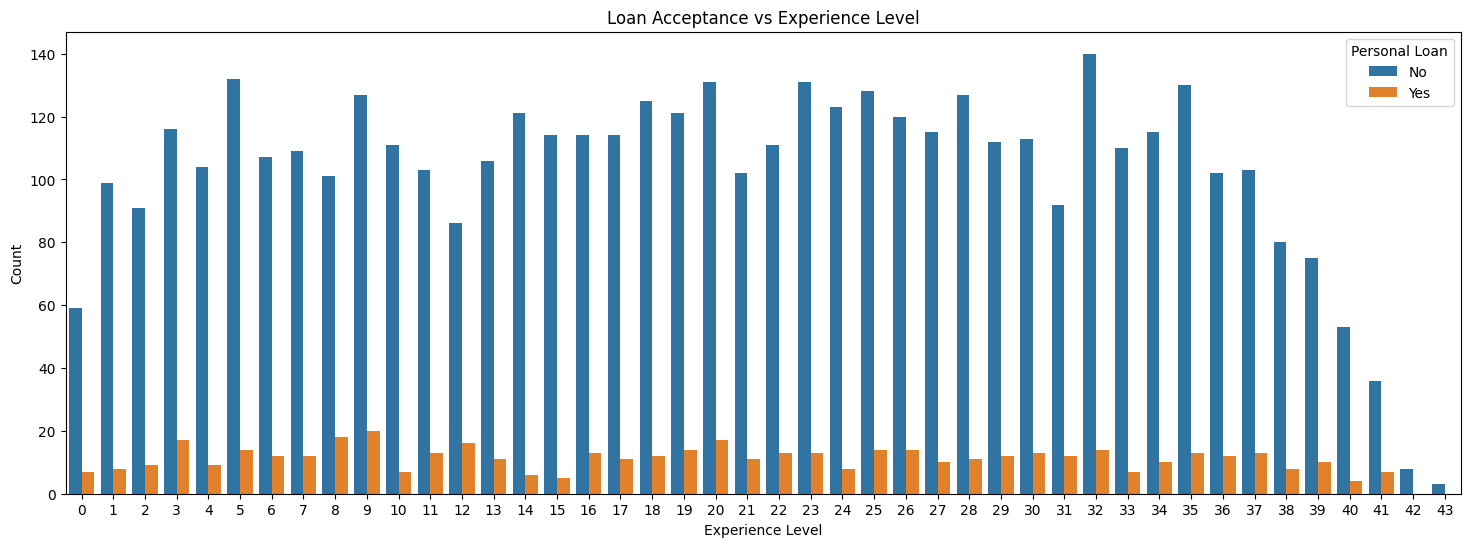

In [ ]:
# Visualize the target variable (Persoanl Loan) with respect to Experience
plt.figure(figsize=(18, 6))
sns.countplot(x='Experience', hue='Personal_Loan', data=data)
plt.title('Loan Acceptance vs Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.legend(title='Personal Loan', labels=['No', 'Yes'])
plt.show()

* No perticular assumption can be made from this plot.
* Buying of Personal Loan with respect to Experience has not much significance.

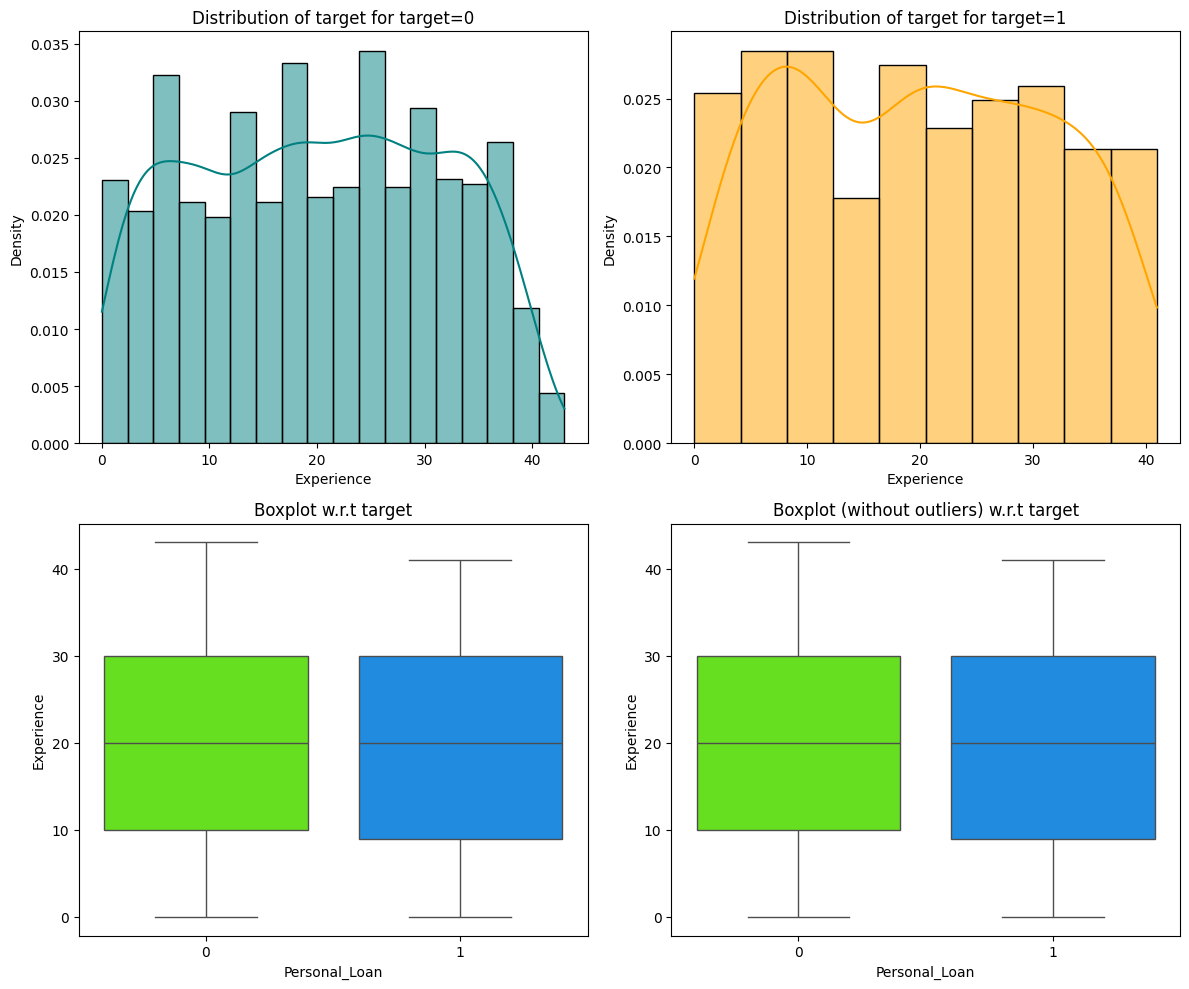

In [ ]:
# Another way to visualize the (Persoanl Loan) with respect to Experience
distribution_plot_wrt_target(data, "Experience", "Personal_Loan")

## Observation
* The trend looks almost same, not a significant impact of having experience and not having experience on buying personal loans.

**Let's analyze the relation between `Income` and `Persoanl Loan`.**

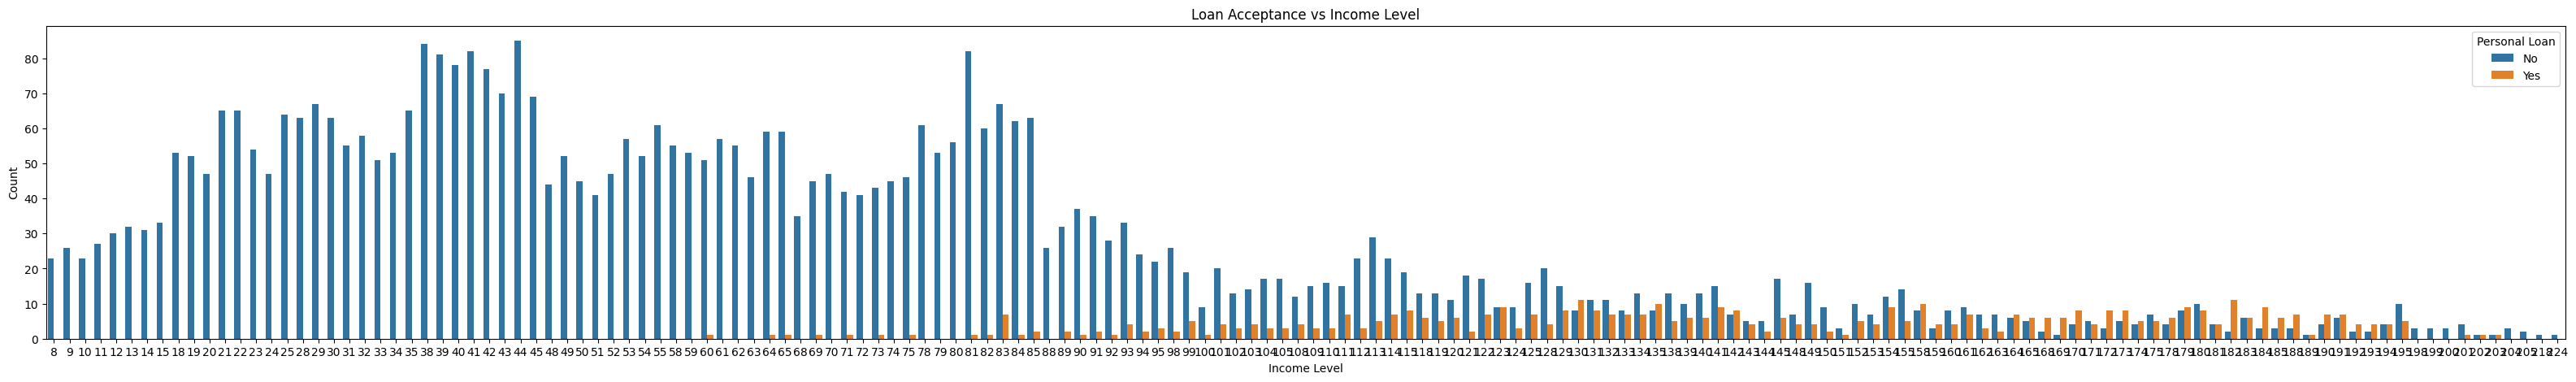

In [ ]:
# Visualize the target variable (Persoanl Loan) with respect to Income
plt.figure(figsize=(40, 5))
sns.countplot(x='Income', hue='Personal_Loan', data=data)
plt.title('Loan Acceptance vs Income Level')
plt.xlabel('Income Level')
plt.ylabel('Count')
plt.legend(title='Personal Loan', labels=['No', 'Yes'])
plt.show()

* This plot doesn't give a maningful visualization.
* It can be seen that higher income levels has more loan purchases.

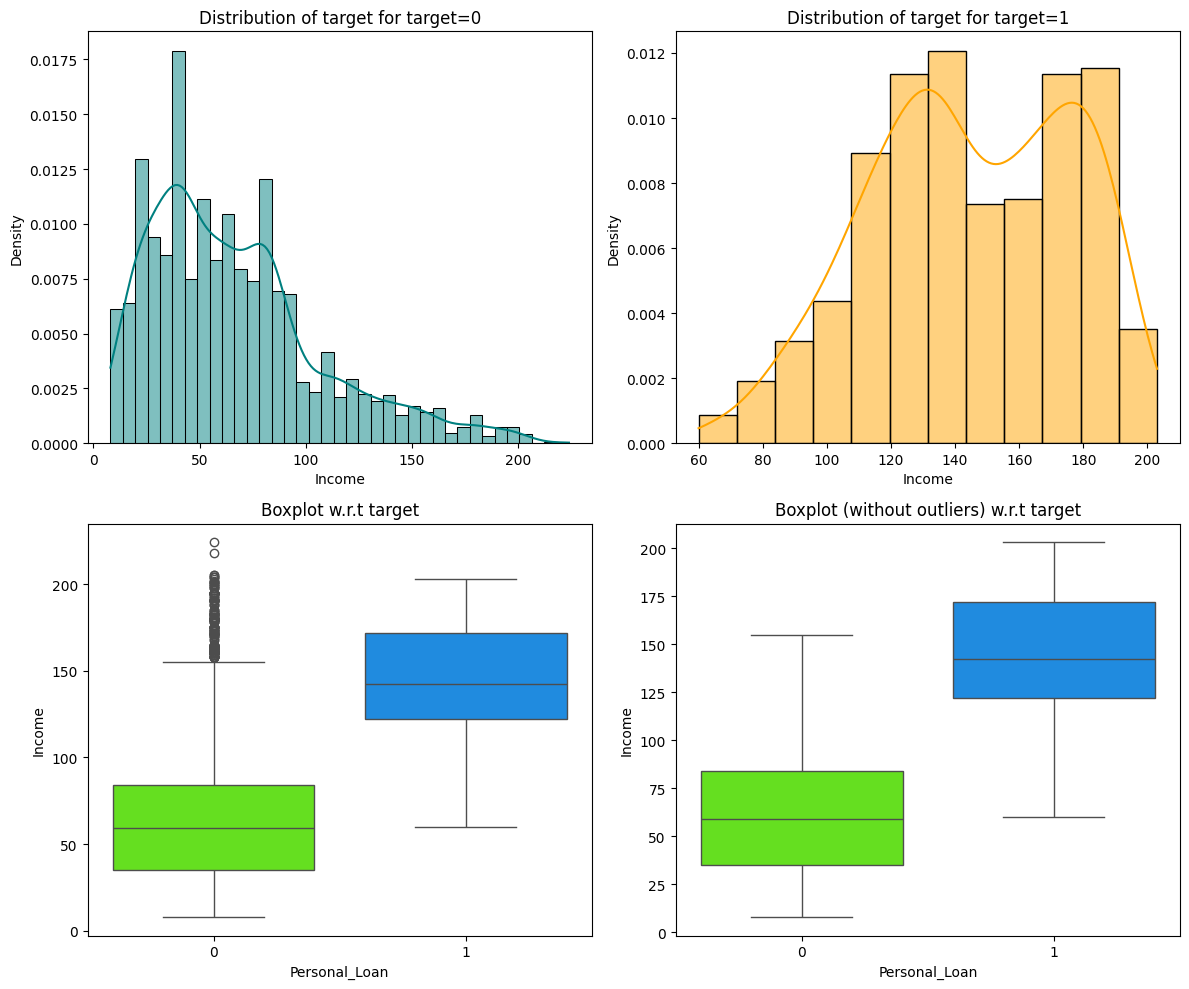

In [ ]:
# Another way to visualize the (Persoanl Loan) with respect to Income
distribution_plot_wrt_target(data, "Income", "Personal_Loan")

## Observation
* The distribution indicates from those who bought the Personal Loan, that higher the income more likely the customer will accept it.
* The income of those who bought th eloan lies approximately between \$125K to \$175K.


**Let's analyze the relation between `Credit Card` and `Persoanl Loan`.**

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


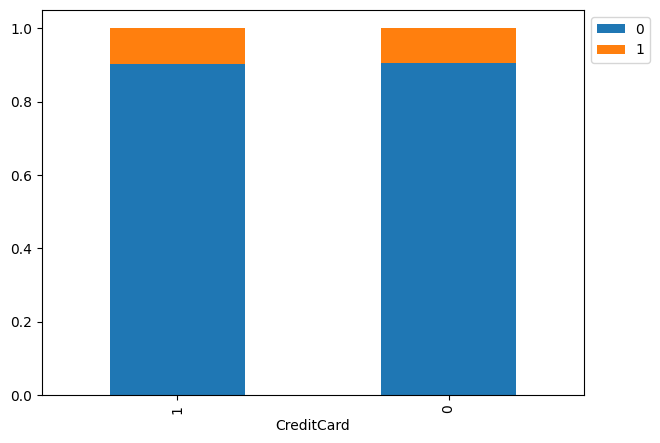

In [ ]:
# Visualize the target variable (Persoanl Loan) with respect to CreditCard
stacked_barplot(data, "CreditCard", "Personal_Loan")

* No significant impact of having or not having credit cards on the purchase of Personal Loan.

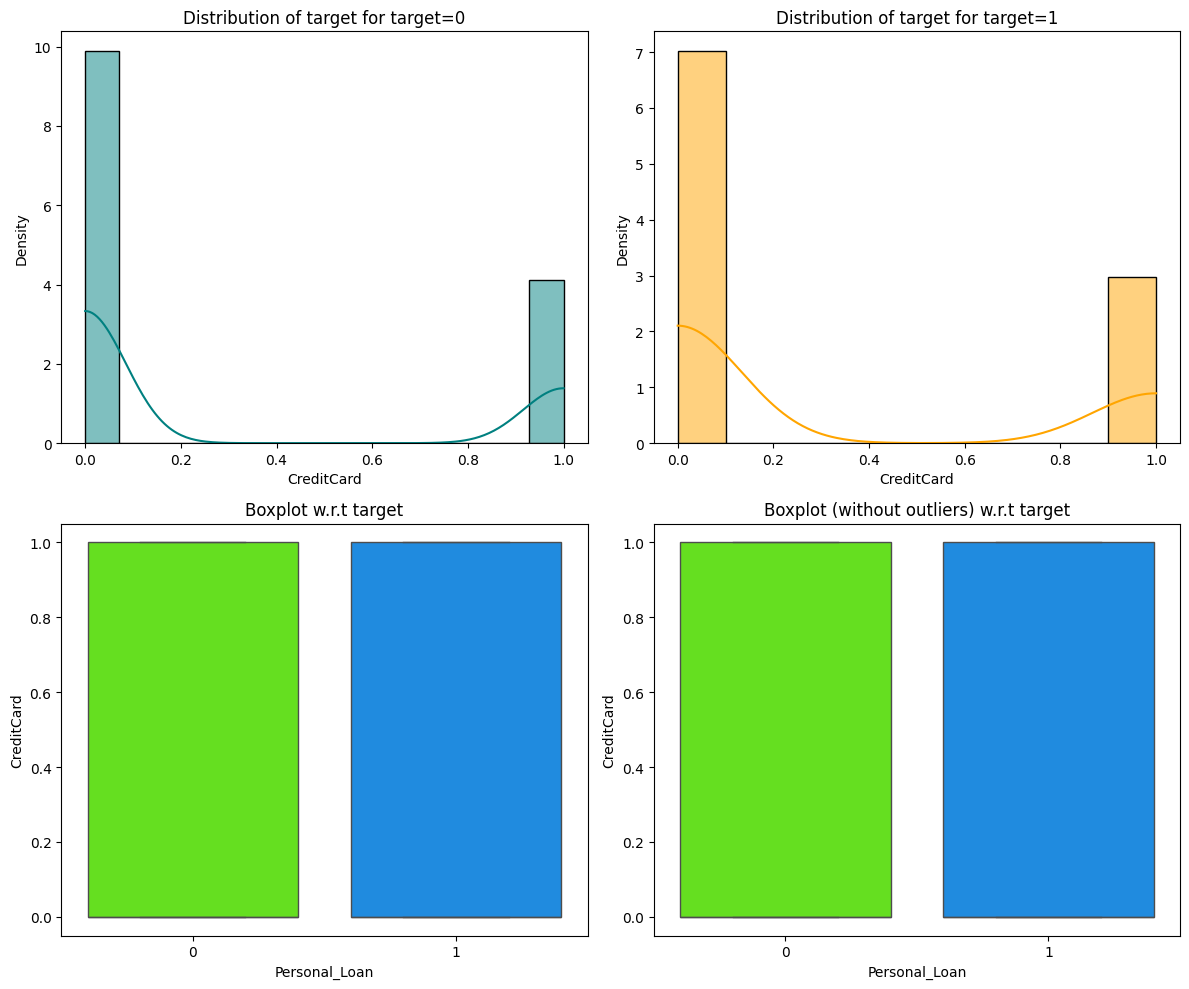

In [ ]:
# Another way to visualize the (Persoanl Loan) with respect to CreditCard
distribution_plot_wrt_target(data, "CreditCard", "Personal_Loan")

* Same can be seen from this plot too, so significance of Credit Cards on Purchase of Loans.

**Let's analyze the relation between `Family` and `Persoanl Loan`.**

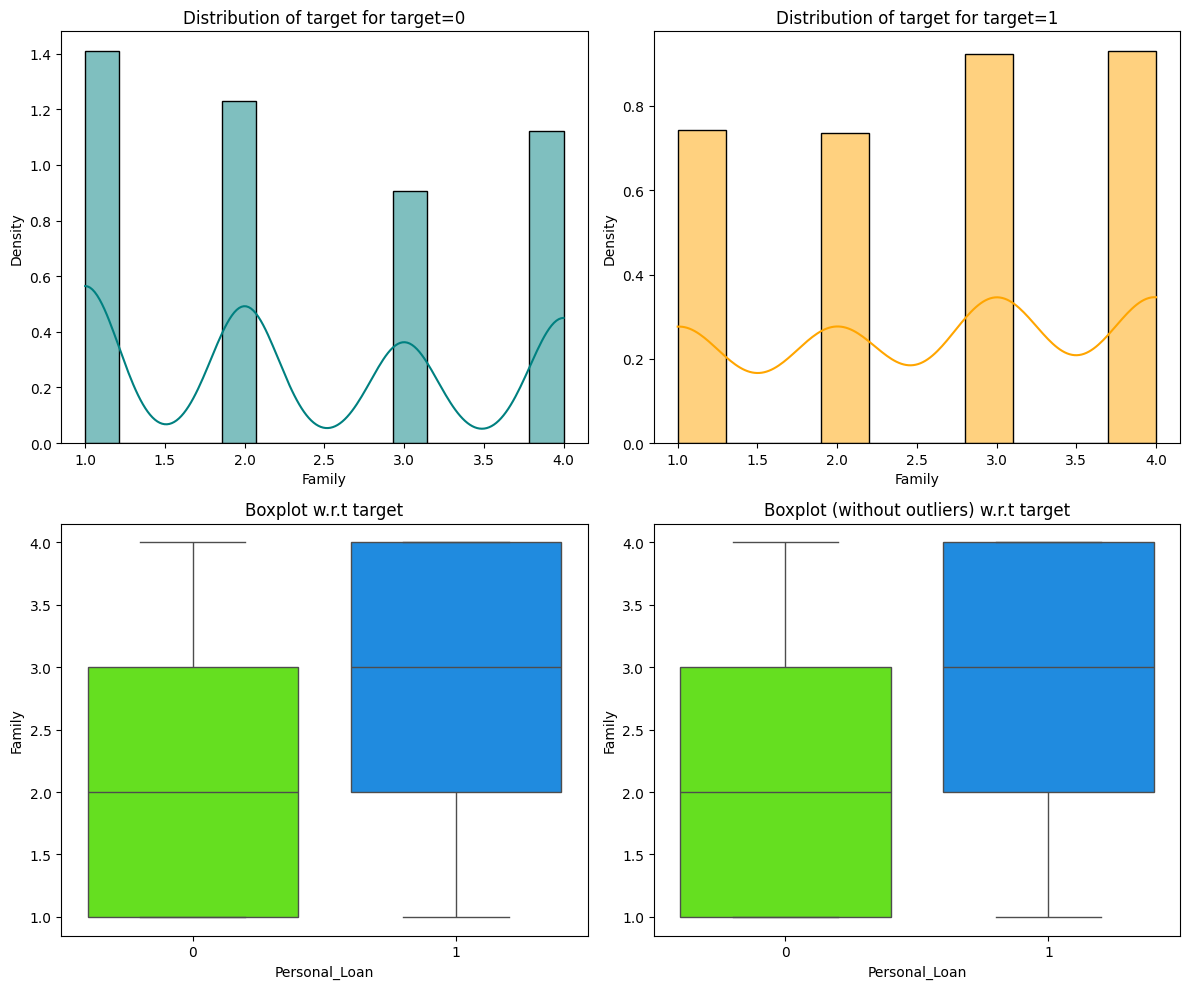

In [ ]:
# Visualize the (Persoanl Loan) with respect to Family
distribution_plot_wrt_target(data, "Family", "Personal_Loan")

* Boxplot shows customer with family members more or equal to 2 have tendency to purchase Personal Loans.

**Let's analyze the relation between `Mortgage` and `Persoanl Loan`.**

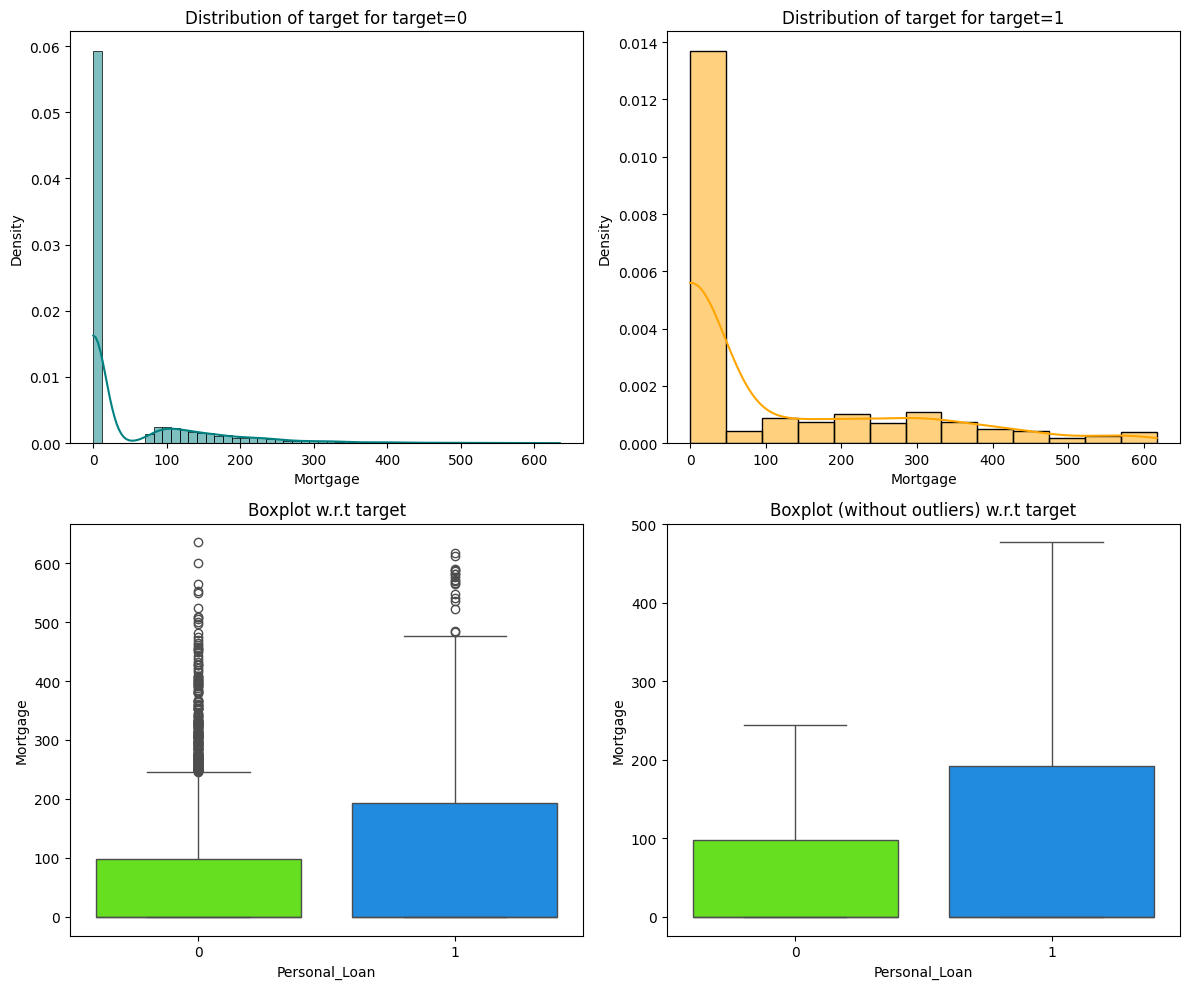

In [ ]:
# Visualize the (Persoanl Loan) with respect to Mortgage
distribution_plot_wrt_target(data, "Mortgage", "Personal_Loan")

* Mortgage doesn't seems to play a significant role in Loan purchases.
* Customers with higher Mortgage seems to be accepting Personal Loans slightly more.

**Let's analyze the relation between `Securities_Account` and `Persoanl Loan`.**

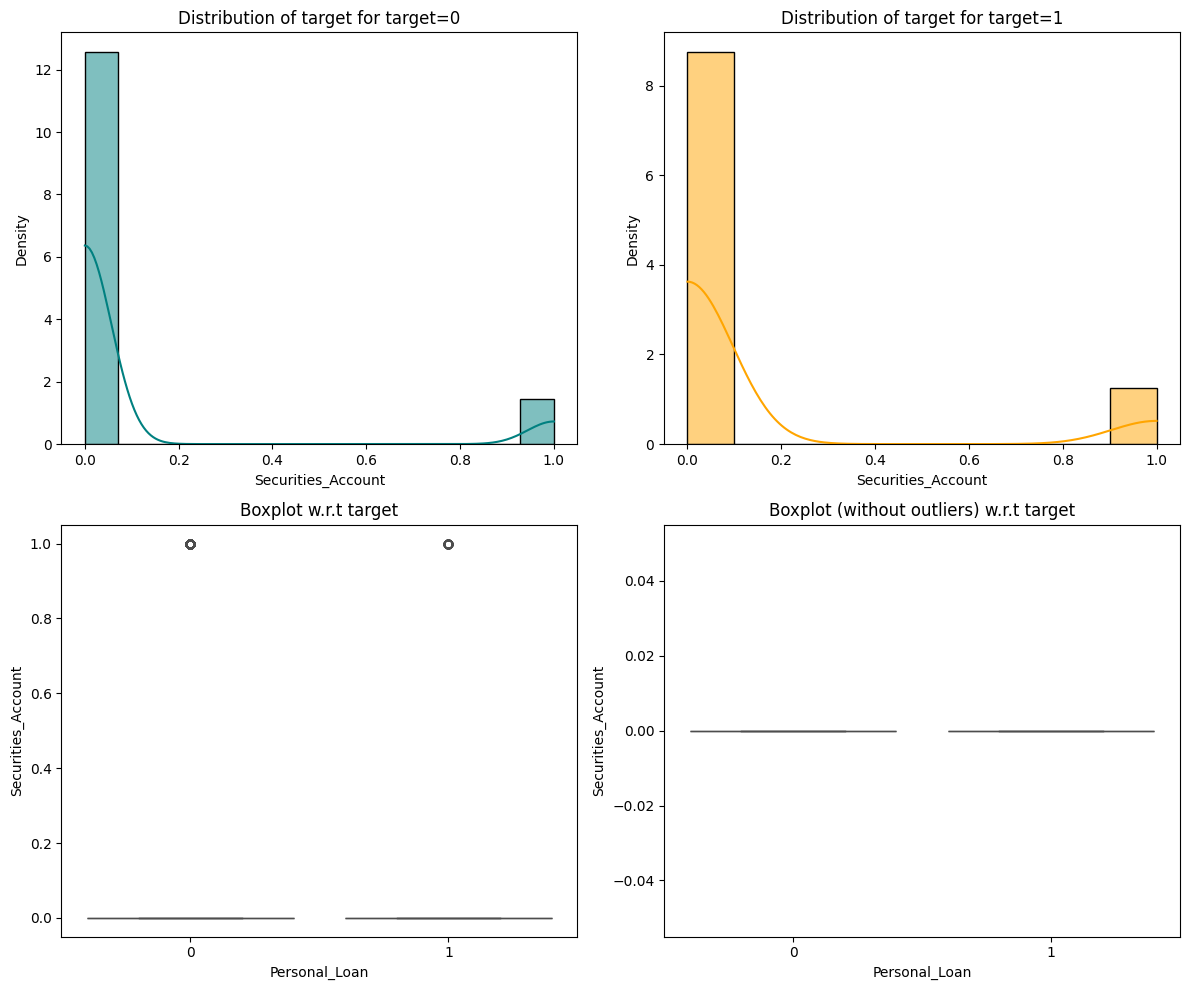

In [ ]:
# Visualize the (Persoanl Loan) with respect to Securities_Account
distribution_plot_wrt_target(data, "Securities_Account", "Personal_Loan")

* Securities Account has no impact on the Personal Loan purchase.

**Let's analyze the relation between `CD_Account` and `Persoanl Loan`.**

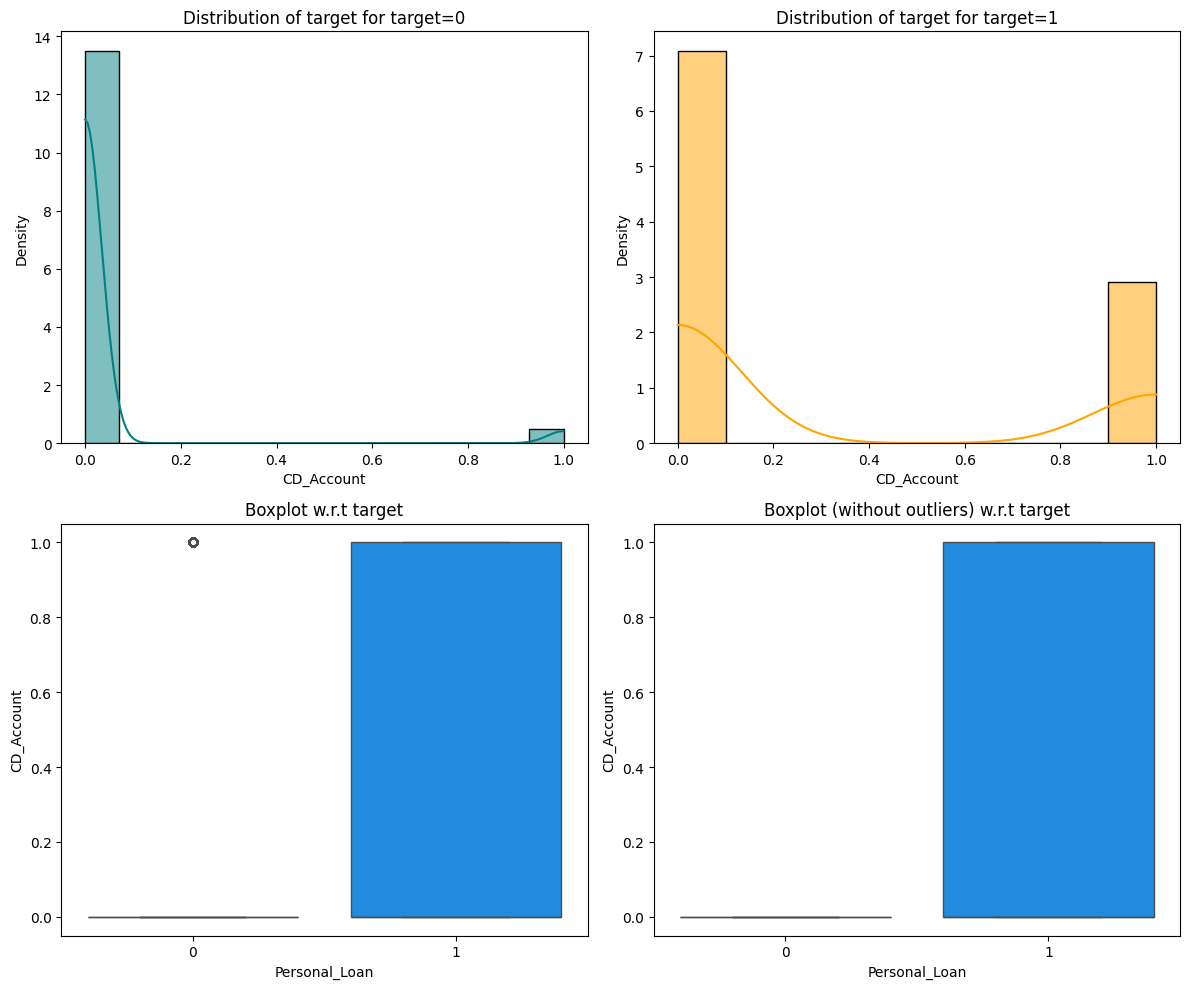

In [ ]:
# Visualize the (Persoanl Loan) with respect to CD_Account
distribution_plot_wrt_target(data, "CD_Account", "Personal_Loan")

* CD_Account is also not showing any significance for the customers in purchasing a Personal Loan.

**Let's analyze the relation between `Online` and `Persoanl Loan`.**

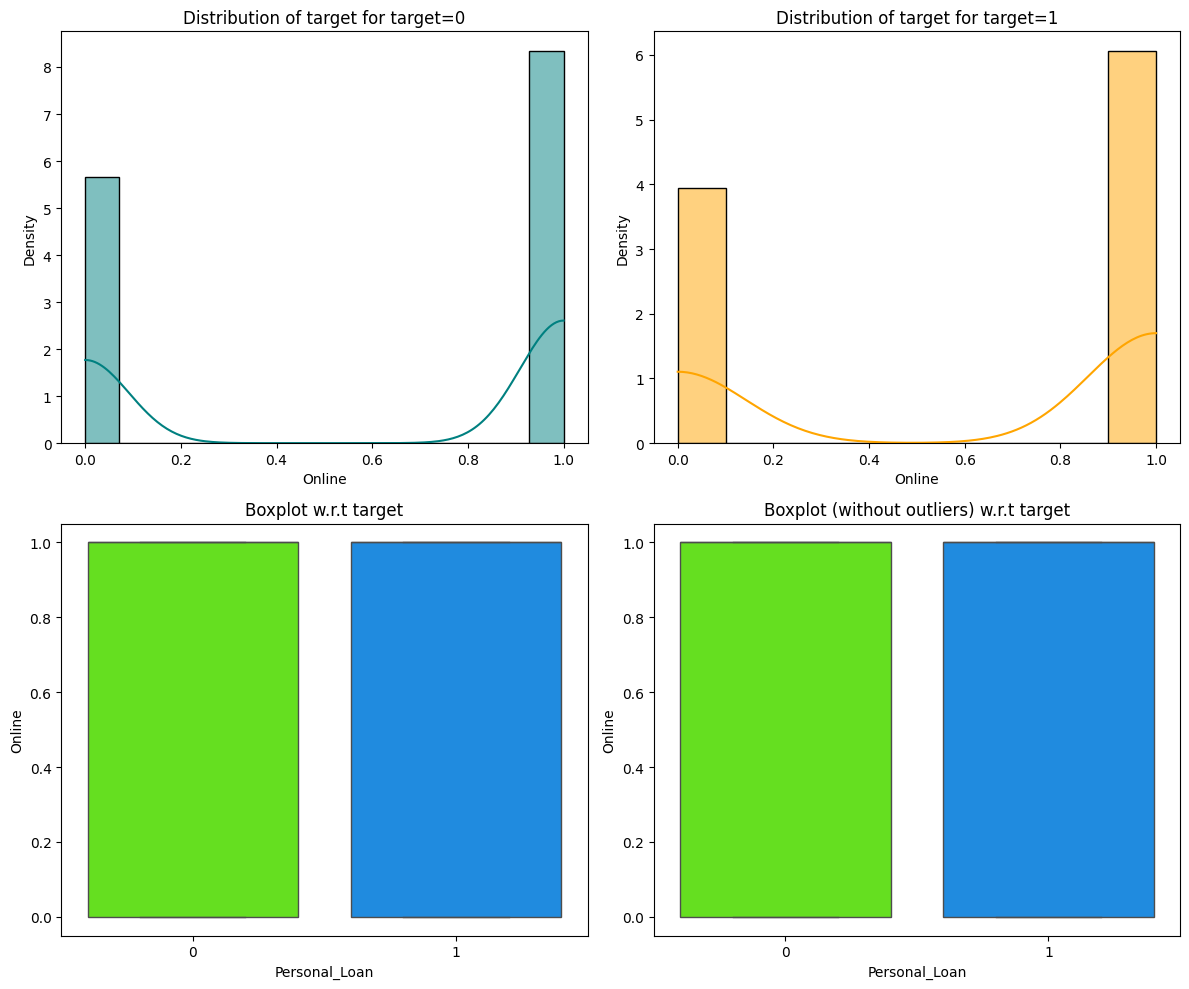

In [ ]:
# Visualize the (Persoanl Loan) with respect to online
distribution_plot_wrt_target(data, "Online", "Personal_Loan")

* Attribute online is also not showing any impact on Personal Loan purchase.

## Exploratory Data Analysis (EDA) Summary

## Summary
* Missing value treatment (already verified: no missing values).
* No duplicate values were found.
* No null values were found.
* Corrected negative "Experience" values by taking absolute.
* Dropped irrelevant attributes (such as ID and ZIPCode).
* Median age is relatively consistent between those who accepted and those who did not accept loans, though customers accepting loans are marginally younger on average.
* higher education significantly increases the likelihood of accepting a personal loan.
* higher income significantly increases the likelihood of accepting a personal loan.
* Having or not having Credit Card don't have much significance to loan acceptance.
* Experience don't show much significance with respect to loan acceptance.

## Next Steps
* May need to perform Outlier treatment to features like Income, Mortgage and CCAvg.
* Need to encode categorical features of Education.
* Prepare the data for Modeling by spliting it into training and test sets.

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

**There were no missing values in the dataset.**  

## Outlier detection and treatement
* Decision trees are relatively robust to outliers because they focus on splitting data based on sample proportions rather than absolute values.
* We need to analyze the outliers to determine if they are made in error or are geniune readings. Outlier treatment will be done if these readings were a result of an anomaly or in error.

**Let's check for outliers in the data.**



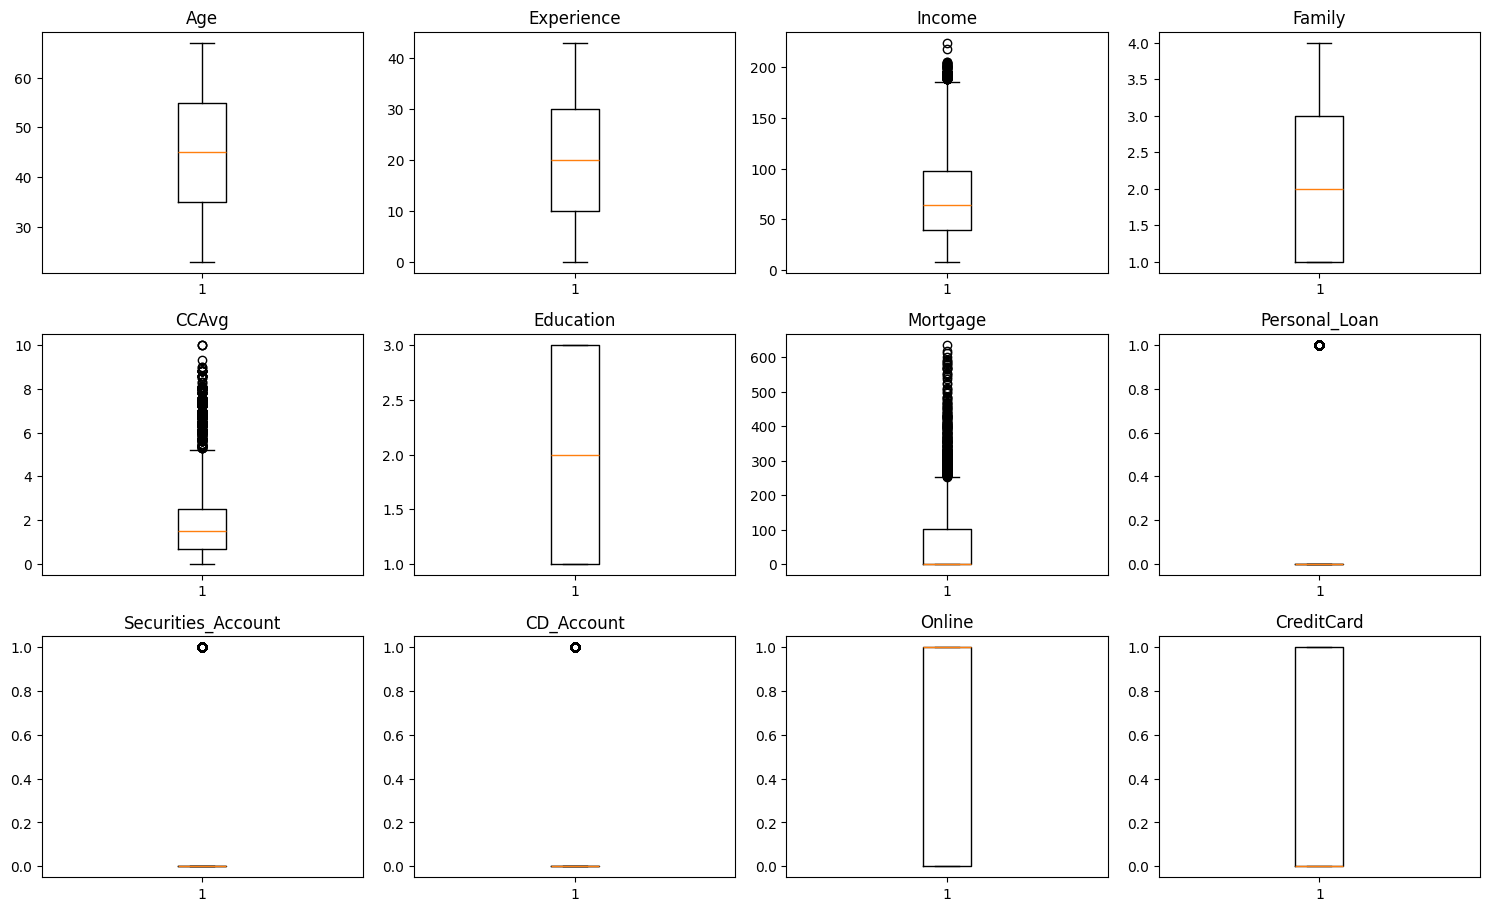

In [ ]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

## Observations

* There are quite a few outliers in the data CCAvg, Mortgage and Income features.
* However, we will not treat them as they are proper values.

## Feature Engineering
* Adding columns by One-Hot Encoding of "Education" feature.
* One Hot Encoding-Method is a form of Feature Engineering. It is a method to transform the strings of categorical variables into numbers, so that we can feed these variables in machine learning algorithms using sklearn.

In [ ]:
# Encoding 'Education' as categorical (one-hot encoding)
data = pd.get_dummies(data, columns=['Education'], drop_first=True)

In [ ]:
# Visualizing the first 5 rows
data.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Education_2,Education_3
0,25,1,49,4,1.6,0,0,1,0,0,0,False,False
1,45,19,34,3,1.5,0,0,1,0,0,0,False,False
2,39,15,11,1,1.0,0,0,0,0,0,0,False,False
3,35,9,100,1,2.7,0,0,0,0,0,0,True,False
4,35,8,45,4,1.0,0,0,0,0,0,1,True,False


* Added 2 more columns "Education_2" and "Education_3" and Education_1 was dropped.

### Data Preparation for Modeling

### Preparing for Training and Testing

In [ ]:
# Splitting data in train and test sets
X = data.drop(["Personal_Loan"], axis=1) # dropping the Personal Loan feature
Y = data["Personal_Loan"] # target is Personal Loan

X = pd.get_dummies(X, drop_first=True) # converts categorical to numerical, useful when preparing data for machine learning algorithms that require numeric input.

X = X.astype(float) #  explicitly convert numerical data to the float data type, ensure all the data is of same type and compatible with ML libraries and prevent loss of precision.

# Splitting data in train (70%) and test sets (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [ ]:
# Printing the details of the Split
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 12)
Shape of test set :  (1500, 12)
Percentage of classes in training set:
Personal_Loan
0    0.905429
1    0.094571
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.900667
1    0.099333
Name: proportion, dtype: float64


* We had seen that around 90.4% of observations belongs to class 0 (Not purchased the loan) and 9.6% observations belongs to class 1 (Bought the Loan), and this is preserved in the train and test sets.

## Model Building

### Model Evaluation Criterion

**Model can make wrong predictions as:**
- Predicting a customer will not buy the loan, but in reality, the customer will buy the loan (FN)
- Predicting a customer will buy the loan, but in reality, the customer will not buy the loan (FP)

**Which case is more important?**

### False Negative (FN):
* The model predicts a customer will not buy the loan, but in reality, the customer would have bought it.
* Implication for the bank:
1. Loss of potential revenue (interest earnings from the loan).
2. Missed opportunity to grow loan business.
3. Possible dissatisfaction due to not being targeted for beneficial loan offers.

### False Positive (FP):
* The model predicts a customer will buy the loan, but in reality, the customer doesn't buy it.
* Implication for the bank:
1. Wasted marketing resources (campaign costs).
2. Potentially annoyed customers due to irrelevant promotional campaigns.
3. Minor reputational risk due to unwanted marketing communications or offers.

**How to reduce the losses?**

For AllLife Bank, the primary business goal is to expand the loan business and increase earnings through interest. The cost of missing a potential borrower (False Negative) typically outweighs the cost associated with incorrect market targeting (False Positive).
* Given the above considerations, the bank should prioritize minimizing False Negatives. Hence, choose metrics sensitive to FN, such as: Recall (Sensitivity), greater the Recall score, higher are the chances of minimizing false negatives.

### Defining Performance Matrics
* We will now define functions to compute the matrics like Accuracy, Recall, Precision and F1 score.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# Creating a function to measure the confusion matrix to see the FP, and FN
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Decision Tree (default)

* We will first start with the default Decision Tree

In [ ]:
# creating model_0 for Decision Tree algorithm without assigning class_weights
model_0 = DecisionTreeClassifier(random_state=1)
model_0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

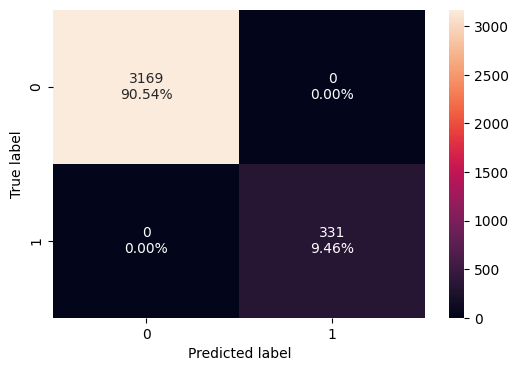

In [ ]:
# Visualize the Confusion Matrix
confusion_matrix_sklearn(model_0, X_train, y_train)

In [ ]:
# Determining the Accuracy, Recall, Precision and F1-scores
decision_tree_default_perf_train = model_performance_classification_sklearn(
    model_0, X_train, y_train
)
decision_tree_default_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


### Observations
* There are no false negatives and no false positives, meaning everything was perfectly classified on training dataset.  
* 100% Accuracy, Recall and Precision values. The model may be overfit.
* We need to run the model on test to see the real efficiency of this model.
* Model is able to perfectly classify all the data points on the training set.
* 0 errors on the training set, each sample has been classified correctly.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.

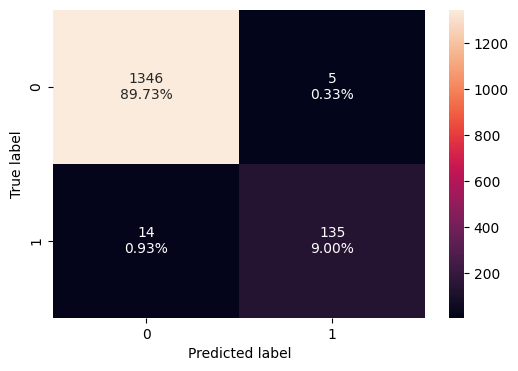

In [ ]:
# Confusion Matrix on Test Data
confusion_matrix_sklearn(model_0, X_test, y_test)

In [ ]:
# Determining the Accuracy, Recall, Precision and F1-scores
decision_tree_default_perf_test = model_performance_classification_sklearn(
    model_0, X_test, y_test
)
decision_tree_default_perf_test

,Accuracy,Recall,Precision,F1
0,0.987333,0.90604,0.964286,0.934256


### Observations
* There are 14 False Negatives and 5 False Positives on the test run.
* Accuracy of 98%, Recal 90%, Precision 96% and F1 is 93%.
* Overall the model performed well on the test data, if the values determined were very sckewd and makes no sense then we could have concluded that the model overfited.

### Decision Tree (with class_weights)
* Lets examine another model with class weights
* If the frequency of class 0 ( not buying the loan) is 90% and the frequency of class 1 (buying the loan) is 10%, then class 0 will become the dominant class and the decision tree will become biased toward the dominant classes
* In this case, we will set class_weight = "balanced", which will automatically adjust the weights to be inversely proportional to the class frequencies in the input data.
* class_weight is a hyperparameter for the decision tree classifier

In [ ]:
# creating model_1 for Decision Tree algorithm assigning class_weights = Balanced
model_1 = DecisionTreeClassifier(random_state=1, class_weight="balanced") # since the classes are not balanced weight the minority class heavily
model_1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

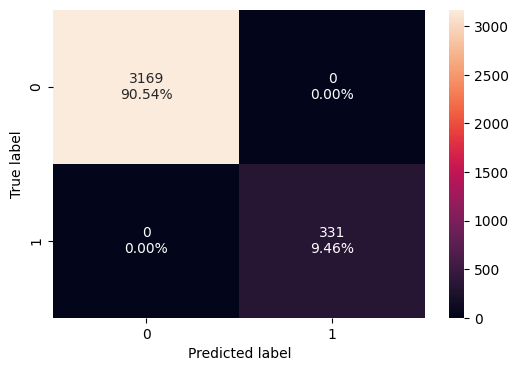

In [ ]:
# Visualize the Confusion Matrix
confusion_matrix_sklearn(model_1, X_train, y_train)

In [ ]:
# Determining the Accuracy, Recall, Precision and F1-scores
decision_tree_perf_train = model_performance_classification_sklearn(
    model_1, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


### Observations
* There are no false negatives and no false positives, meaning everything was perfectly classified on training dataset.  
* 100% Accuracy, Recall and Precision values. The model may be overfit.
* We need to run the model on test to see the real efficiency of this model.
* Model is able to perfectly classify all the data points on the training set.
* 0 errors on the training set, each sample has been classified correctly.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.

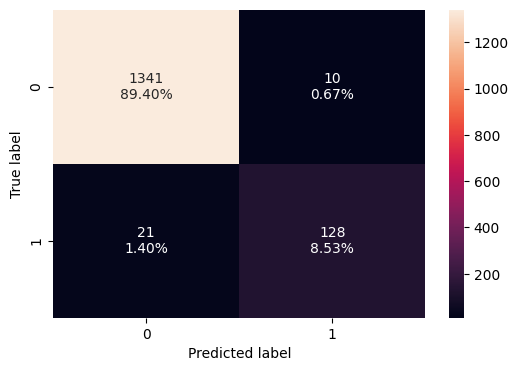

In [ ]:
# Confusion Matrix on Test Data
confusion_matrix_sklearn(model_1, X_test, y_test)

In [ ]:
# Determining the Accuracy, Recall, Precision and F1-scores
decision_tree_perf_test = model_performance_classification_sklearn(
    model_1, X_test, y_test
)
decision_tree_default_perf_test

,Accuracy,Recall,Precision,F1
0,0.987333,0.90604,0.964286,0.934256


### Observations
* There are 21 False Negatives and 10 False Positives on the test run.
* The values dropped, Accuracy reduced to 97%, Recal to 85%, Precision to 92% and F1 to 89%.
* Overall the model didn't perform bad, however the drop in the Recall and F1 values indicates that the model might be a bit overfit.

## Model Performance Improvement

**Let's use pruning techniques to try and reduce overfitting.**

### Decision Tree (Pre-pruning)

* Hyperparameter tuning is crucial because it directly affects the performance of a model.
* Unlike model parameters which are learned during training, hyperparameters need to be set before training.
* Effective hyperparameter tuning helps in improving the performance and robustness of the model.
* We will now find the best training model from (Class_Weight = Balanced) which gives us the best Recall.

In [ ]:
# The below custom loop for hyperparameter tuning iterates over predefined parameter values to identify the best model based on the metric of choice (recall score).
# Define the parameters of the tree to iterate over
max_depth_values = np.arange(2, 7, 2)
max_leaf_nodes_values = [50, 75, 150, 250]
min_samples_split_values = [10, 30, 50, 70]

# Initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

# Iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # Initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                class_weight='balanced',
                random_state=42
            )

            # Fit the model to the training data
            estimator.fit(X_train, y_train)

            # Make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # Calculate recall scores for training and test sets
            train_recall_score = recall_score(y_train, y_train_pred)
            test_recall_score = recall_score(y_test, y_test_pred)

            # Calculate the absolute difference between training and test recall scores
            score_diff = abs(train_recall_score - test_recall_score)

            # Update the best estimator and best score if the current one has a smaller score difference
            if (score_diff < best_score_diff) & (test_recall_score > best_test_score):
                best_score_diff = score_diff
                best_test_score = test_recall_score
                best_estimator = estimator

# Print the best parameters
print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")
print(f"Best test recall score: {best_test_score}")

Best parameters found:
Max depth: 2
Max leaf nodes: 50
Min samples split: 10
Best test recall score: 1.0


* The best pre-pruned training model's parameters were found, depth = 2, max leaf nodes = 50, minimum sample split = 10 and Recall score = 100%

In [ ]:
# creating an instance of the best model
model_2 = best_estimator

# fitting the best model to the training data
model_2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=np.int64(2),
                       max_leaf_nodes=50, min_samples_split=10,
                       random_state=42)

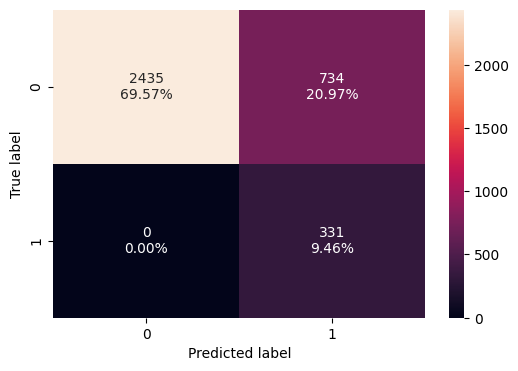

In [ ]:
# Visualizing Confusion Matrix
confusion_matrix_sklearn(model_2, X_train, y_train)

In [ ]:
# Determining the Accuracy, Recall, Precision and F1-scores
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    model_2, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.790286,1.0,0.310798,0.474212


* It was found that on training dataset, Accuracy of best model is 79% with 100% Recall score.
* Lets see the test scores.

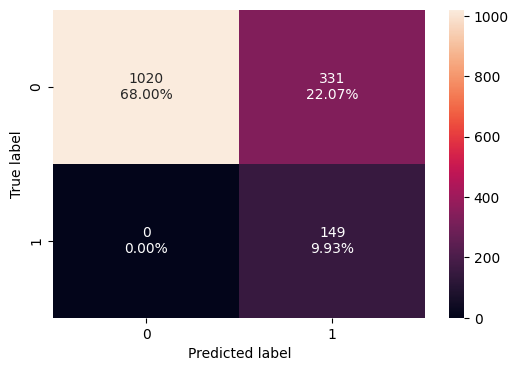

In [ ]:
# Confusion Matix for test
confusion_matrix_sklearn(model_2, X_test, y_test)

* No False Negaives

In [ ]:
# Determining the Accuracy, Recall, Precision and F1-scores
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    model_2, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.779333,1.0,0.310417,0.473768


* The model is giving a generalized result now since the recall scores on both the train and test data are coming to be around 100% which shows that the model is able to generalize well on unseen data.

## Visualizing the Decision Tree

In [ ]:
# Determining the important features for spliting the nodes of decision tree
feature_names = list(X_train.columns)
importances = model_2.feature_importances_
indices = np.argsort(importances)

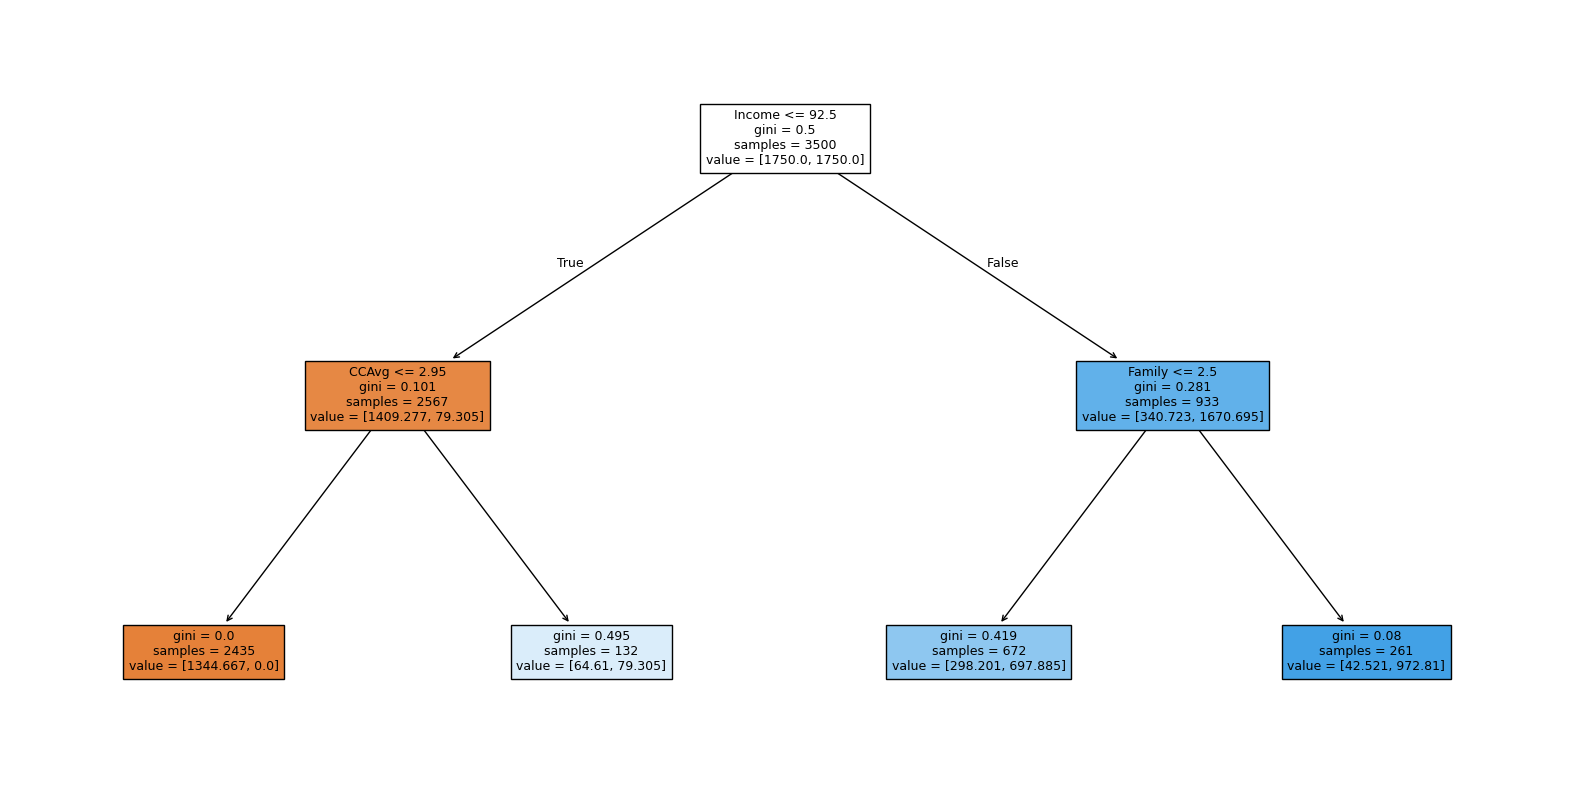

In [ ]:
# Plotting the Pre Prune Decision Tree
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    model_2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()


* Splited the Dataset on Income, CCAvg and Family features.
* Education feature was not used for spliting.

In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(model_2, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [64.61, 79.31] class: 1
|--- Income >  92.50
|   |--- Family <= 2.50
|   |   |--- weights: [298.20, 697.89] class: 1
|   |--- Family >  2.50
|   |   |--- weights: [42.52, 972.81] class: 1



Using the above extracted decision rules we can make interpretations from the decision tree model like:

* If the Income is less than or equal to \$92.50K, the Credit Card Average is less than or equal to 2.95, the Family size is less than or equal to 2.5, then the customer is most likey to purchase the loan.
* This shows that the most important features according to a pre-pruned Decision Tree, governing the decision of a customer to purchase a loan are: Income, Credit cards and Family size.

### Finding these Important Spliting Features

In [ ]:
# Now find these importance
importances = model_2.feature_importances_
importances

array([0.        , 0.        , 0.87652937, 0.05653065, 0.06693998,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

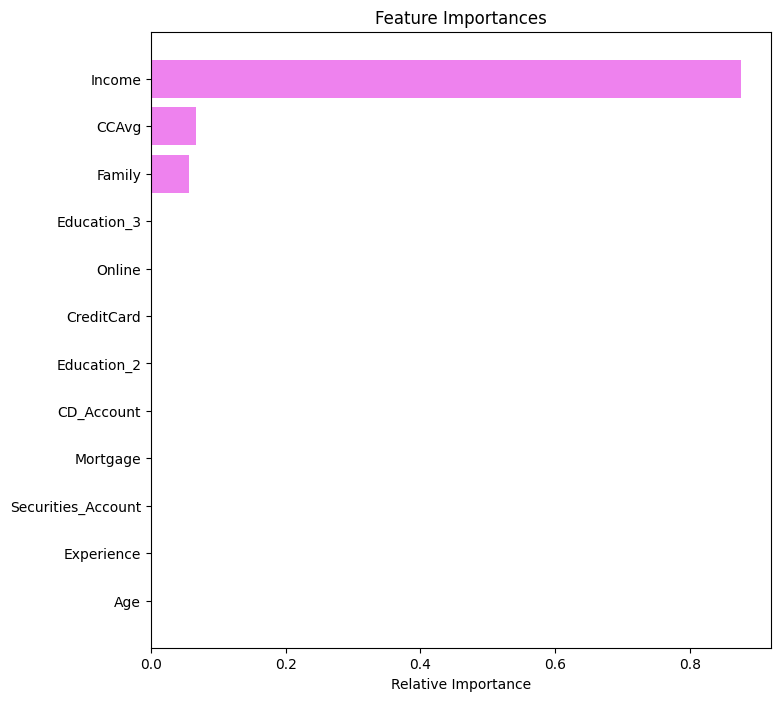

In [ ]:
# importance of features in the tree building, plotting them to visualize

importances = model_2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* In the pre-pruned decision tree, Income, number of Credit Cards and Family size are the most important features.
* Pre-pruned tree has seemed to completely ignored "Education" feature while prunning.
* Lets check the performance and decision rules of a post-prunned tree.

### Decision Tree (Post pruning)

- Cost complexity pruning provides another option to control the size of a tree.
- In `DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``.
- Greater values of ``ccp_alpha`` increase the number of nodes pruned.
- Here we only show the effect of ``ccp_alpha`` on regularizing the trees and how to choose the optimal ``ccp_alpha`` value.

**Total impurity of leaves vs effective alphas of pruned tree**

Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

In [ ]:
# setting the classifier, path and ccp_alpha values
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [ ]:
# ccp_alpha values with the respective impurities
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,-7.071226e-15
1,3.853725e-19,-7.070841e-15
2,3.853725e-19,-7.070456e-15
3,5.255079e-19,-7.069930e-15
4,5.255079e-19,-7.069405e-15
5,5.255079e-19,-7.068879e-15
6,5.255079e-19,-7.068354e-15
7,1.051016e-18,-7.067303e-15
8,1.576524e-18,-7.065726e-15
9,1.257806e-17,-7.053148e-15


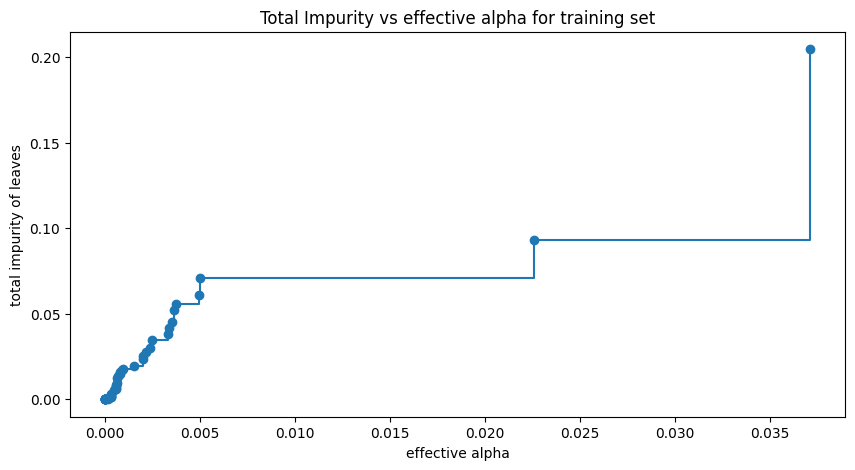

In [ ]:
# Plotting Impurities vs alpha values
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

* As "alpha" values increase the total impurity also increased.
* Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.
* Next determine all the classifiers for the alpha values.

In [ ]:
# Finding classifiers on training dataset on all alpha values
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.29537927599923147


* For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

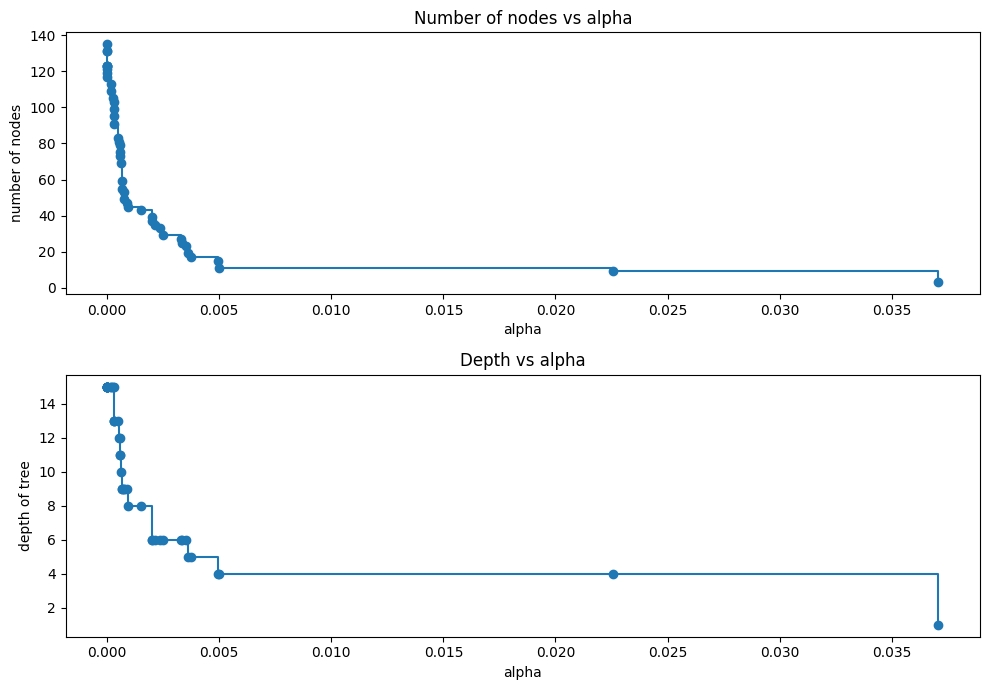

In [ ]:
# Plotting the Alpha values vs Number of Nodes and Depth of the tree
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

* It was seen here that as Alpha increases the number of nodes and depth decreases.
* Our decision to choose the best classifier will depend upon the the best Recall value associated with that classifier.

### Determining all the Recall scores for both Training and Test

In [ ]:
# Recall scores for training dataset
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [ ]:
# Recall scores for test dataset
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [ ]:
# Training and Test scores
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

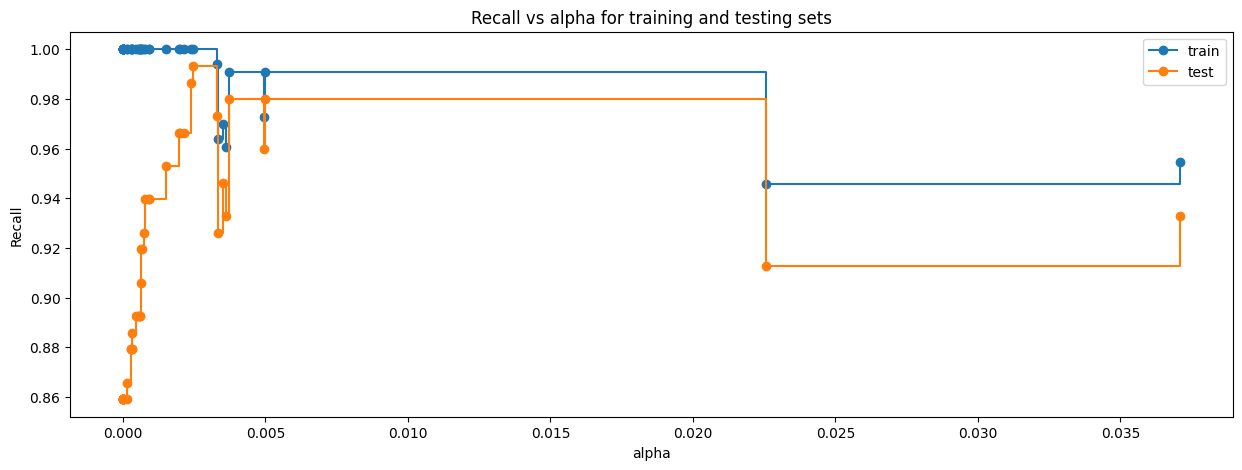

In [ ]:
# Plotting the Recall scores from Training vs Test
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

### Observation
* It was noticed that the Recall score increases for test data as the Alpha increases While for training data the Recall stated at 100%.
* It seems that the best Alpha value is between 0.0020 and 0.0025.
* Lets create a model on the best Recall value.


In [ ]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=np.float64(0.002472659878642135),
                       class_weight='balanced', random_state=1)


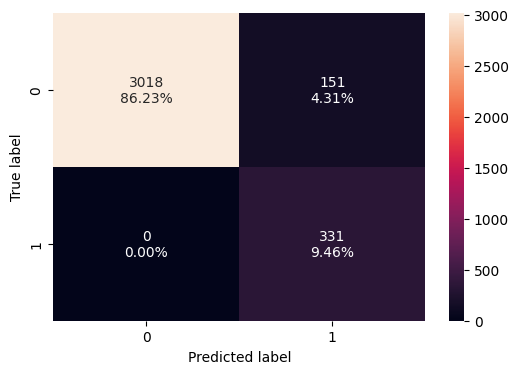

In [ ]:
# Best Model with highest Recall for Train and Test Datasets
# Create confusion matrix for training data
model_3 = best_model
confusion_matrix_sklearn(model_3, X_train, y_train)

In [ ]:
# Determining the Accuracy, Recall, Precision and F1-scores
decision_tree_post_perf_train = model_performance_classification_sklearn(
    model_3, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.956857,1.0,0.686722,0.814268


### Observation
* There were no False Negatives found, while 151 False Positives are configured.
* Accuracy is 95% and Recall 100% while Precision is 68%

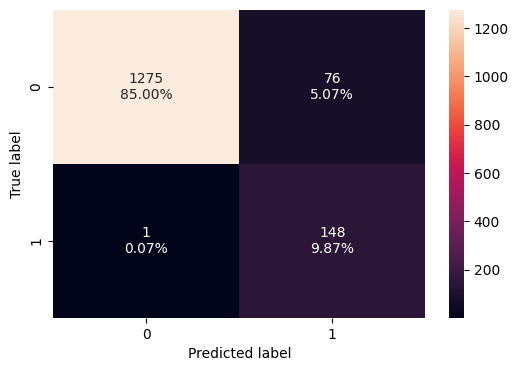

In [ ]:
# Now Confusion Matrix on Test dataset
confusion_matrix_sklearn(model_3, X_test, y_test)

In [ ]:
# Determining the Accuracy, Recall, Precision and F1-scores
decision_tree_post_test = model_performance_classification_sklearn(
    model_3, X_test, y_test
)
decision_tree_post_test

,Accuracy,Recall,Precision,F1
0,0.948667,0.993289,0.660714,0.793566


### Observation
* There is one False Negatives found, while 76 False Positives are configured.
* Accuracy is 94% and Recall 99% while Precision is 66%
* In the post-pruned tree also, the model is giving a generalized result since the recall scores on both the train and test data are coming to be around 100% which shows that the model is able to generalize well on unseen data.

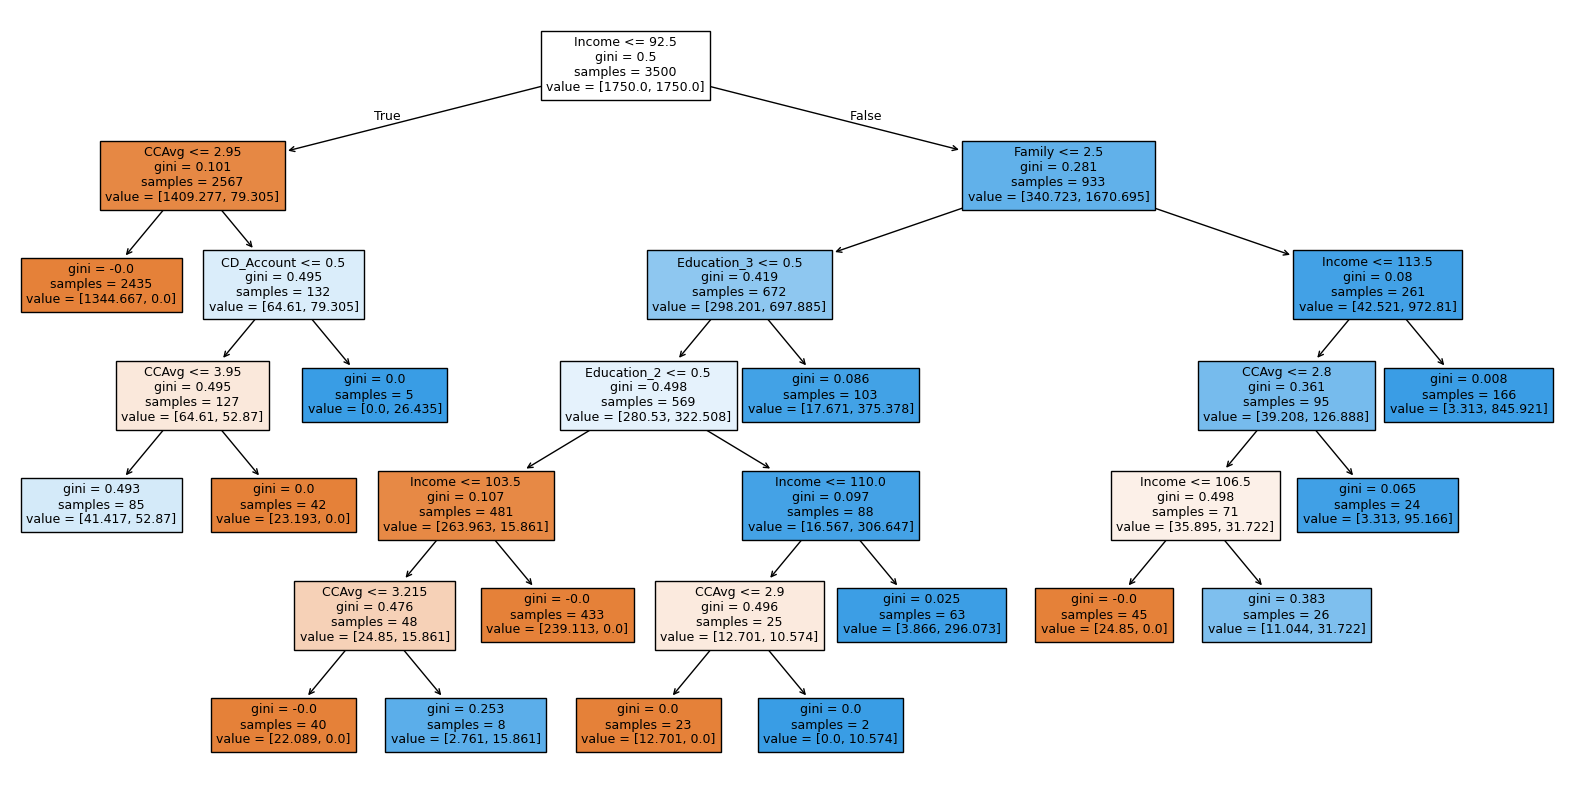

In [ ]:
# Plotting the Post Prune Decision Tree
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    model_3,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

* The post prunned tree is a bit complex than the post-prunned one but we can see that it uses Education feature as one of the spliting criteria.

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model_3, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- weights: [41.42, 52.87] class: 1
|   |   |   |--- CCAvg >  3.95
|   |   |   |   |--- weights: [23.19, 0.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [0.00, 26.44] class: 1
|--- Income >  92.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- Income <= 103.50
|   |   |   |   |   |--- CCAvg <= 3.21
|   |   |   |   |   |   |--- weights: [22.09, 0.00] class: 0
|   |   |   |   |   |--- CCAvg >  3.21
|   |   |   |   |   |   |--- weights: [2.76, 15.86] class: 1
|   |   |   |   |--- Income >  103.50
|   |   |   |   |   |--- weights: [239.11, 0.00] class: 0
|   |   |   |--- Education_2 >  0.50
|   |   |   |   |--- Income <= 110.00
|   |   |   |   |   |--- CCAvg <= 2.90
|   |   |   |   |   |   |--- weights: [12

* Here in the post pruned tree, we see that the most important features to split the nodes are: Income greater or equal to \$92.5K, Family size less or equal to 2.5, weather the customer is educated, Education is Advance/Professional or Graduate and Credat Cards owned average is less than or equal to 3.2 then a customer is more likely to purchase the loan.
* This spliting criterion makes more sense than pre-prune decision rule.  

### Lets determine the important features for post pruned Decision Tree

In [ ]:
# important features
importances = model_3.feature_importances_
indices = np.argsort(importances)

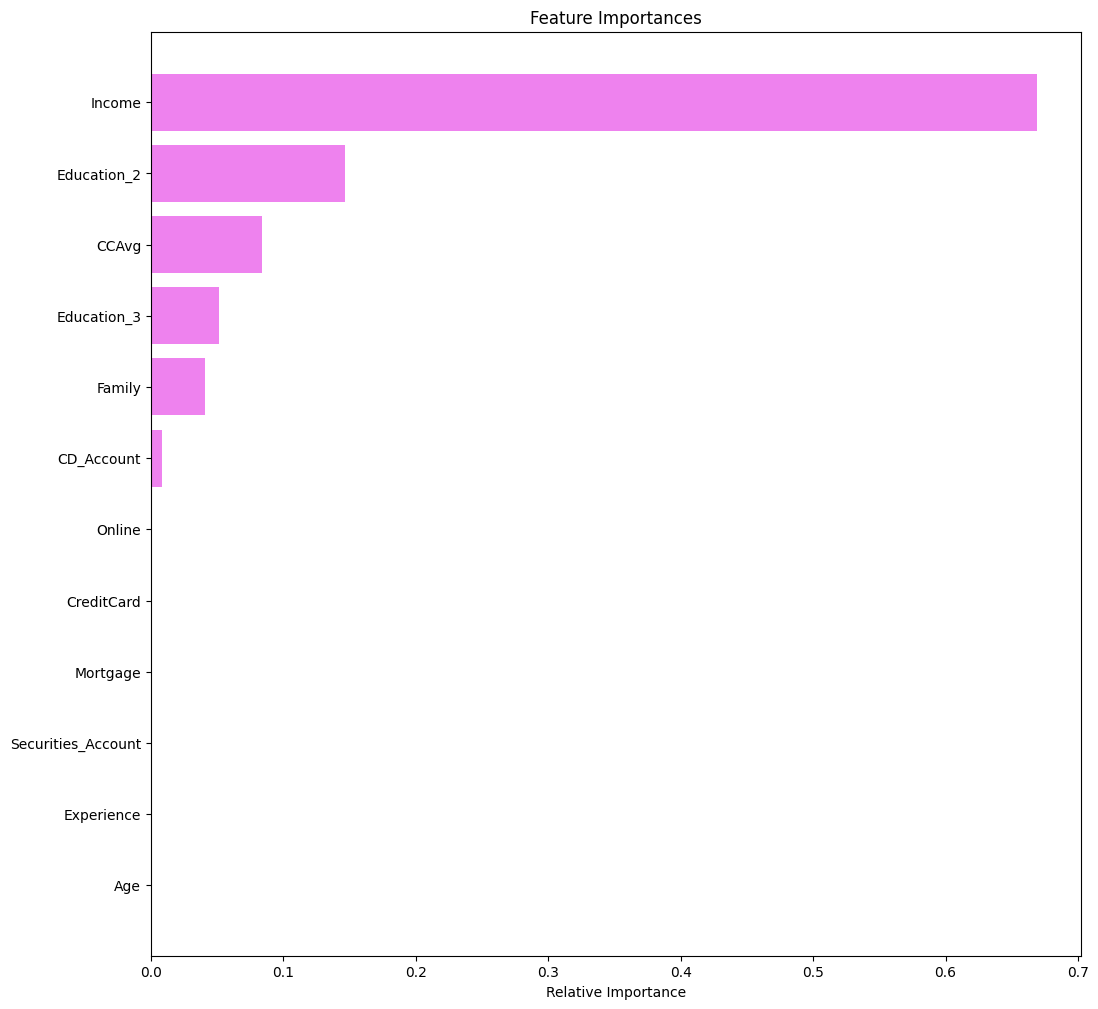

In [ ]:
# Plotting the important features
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Income and Education (Graduate and Advance) are the most important features for post pruned tree.

## Model Performance Comparison and Final Model Selection

Model Comparison

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_default_perf_train.T,
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree (sklearn default),Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,1.0,0.790286,0.956857
Recall,1.0,1.0,1.000000,1.000000
Precision,1.0,1.0,0.310798,0.686722
F1,1.0,1.0,0.474212,0.814268


* In training Post-Prunned Decision Tree has higher Accuracy while keeping 100% Recall score.

In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_default_perf_test.T,
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree (sklearn default),Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.987333,0.979333,0.779333,0.948667
Recall,0.906040,0.859060,1.000000,0.993289
Precision,0.964286,0.927536,0.310417,0.660714
F1,0.934256,0.891986,0.473768,0.793566


* In Test dataset, although the Recall score of Pre-pruned tree is slightly more than the Post Pruned, the accuracy of post-prunned model is 94% which is significantly higher than the pre-prunned.
* Decision tree models with post-pruning is giving high recall scores on both training and test sets.
* It was also noticed that as per our EDA findings, Education and Income both has some significant impact on the purchase of Loan, which is also shown by the best Post-Pruned Decision tree, while Pre-pruned tree has ignored the Education altogether.
* The Post-Prunned tree is better in accuracy and recall, making it the best choice. The Post-Pruned Decision Tree seems to be the best practical model from the results, considering both business objectives (high recall to minimize missed opportunities) and a more acceptable level of accuracy and precision.Therefore, we are choosing the post-pruned tree as our best model.

## Actionable Insights and Business Recommendations


### Analysis of Your Results:
1. Default Decision Tree: (not balanced)
* Very high accuracy (98.73%), high precision, good recall. However, slightly lower recall (90.6%) means some opportunities might be missed.
2. Class Weighted Decision Tree: (balanced)
* Slightly lower accuracy, precision, recall, and F1-score compared to default, but still good performance, especially useful in highly imbalanced scenarios.
3. Pre-Pruned Decision Tree:
* High recall (100%) but significantly lower accuracy (77.93%) and precision (31.04%). This indicates excessive pre-pruning causing underfitting, predicting "loan acceptance" too frequently, resulting in many false positives.
4. Post-Pruned Decision Tree:
* Good balance: decent accuracy (94.87%), excellent recall (99.33%), and reasonable precision (66.07%), making it potentially the most practical for business use.

### Recommended Actions
1. Use the Post-Pruned Decision Tree:
* Results strongly suggest post-pruning is providing the best trade-off, achieving excellent recall (99.33%) and very reasonable accuracy (~95%).
This model ensures minimal missed opportunities for new loan customers.
2. Fine-tuning:
* An approach can be made by further tuning CCP-alpha via cross-validation to further optimize precision without significantly compromising recall.

### What recommedations would you suggest to the bank?

## Recommendations to Increase Revenue for AllLife Bank:

1. Adopt the Post-Pruned Decision Tree Model:

* The selected post-pruned decision tree offers excellent performance, achieving high recall (minimizing missed loan opportunities) and a significantly better accuracy (94%) compared to the pre-pruned model.

* Periodically review and re-validate the model to maintain accuracy over time.

2. Target Marketing Based on Income, Age and Education:

* Customers with higher income and higher education levels show significantly higher likelihoods of accepting loans. Prioritize these customer segments in targeted marketing campaigns.

* Craft tailored messaging and promotional offers emphasizing the financial benefits and value propositions appealing to highly educated and affluent segments.

* The marketing team should focus on high-income, educated customers aged 30-50 for the campaign.

3. Focus Less on Irrelevant Attributes:

* Discontinue considering attributes such as 'Experience', 'Age', and 'Credit Card possession' as primary decision-making criteria. These factors showed minimal influence on loan acceptance.

* Allocate marketing resources away from targeting strategies based on these irrelevant factors, thus reducing unnecessary campaign expenditures.

4. Maintain Data Quality and Consistency:

* Continue ensuring the absence of missing, null, or duplicate values, and maintain the consistency and accuracy of customer data.

* Establish regular data quality audits to preserve model accuracy.

5. Continuous Improvement and Model Monitoring:

* Regularly monitor the performance of the deployed model against real-world outcomes.

* Schedule periodic retraining of the model using the latest customer data to keep up with market dynamics.

6. Strategically Implement Marketing Campaigns:

* Launch campaigns focusing explicitly on individuals identified by the model as highly likely to accept personal loans.

* Highlight personalized financial solutions, flexible loan terms, and attractive interest rates to engage high-value prospects effectively.

* Target customers with Income > 75, Education = 3, aged 30-50, and who have securities accounts.

* Use online banking channels (60% use online) for campaign delivery, leveraging digital touchpoints.

* Offer personalized loan offers based on credit card usage (1500 customers), potentially bundling services.

7. Leverage Predictive Insights for Cross-Selling:

* Explore opportunities to cross-sell additional financial products such as Credit Cards or investment accounts to high-income, highly educated segments, given their openness to financial products as indicated by the analysis.

### Key Takeaways:
* Income is the most significant predictor, suggesting targeting high-income customers (e.g., >75 thousand dollars annually).
* Education level 3 customers are more likely to take loans, so focus on advanced/professional segments.
* Middle-aged customers (30-50) show higher interest, aligning with life stage needs.
* Customers with securities accounts (40% of base) are more likely to take loans, indicating cross-selling potential.

### Next Steps for Implementation:

* Deployment of the Post-Pruned Decision Tree Model: Immediately integrate the model into the bank's marketing systems to start predictive targeting.

* Training and Awareness: Brief the marketing and sales team on how to interpret and use insights from the model effectively.

* Evaluation: Conduct a quarterly review to assess campaign effectiveness, adjusting strategies based on performance metrics.

### Converting Notebook to HTML

In [ ]:
# Converting notebook to html
# Installing Library
!pip install nbconvert

In [ ]:
# Command to convert to html
!jupyter nbconvert Project_2_Full_Code_AdnanNasir.ipynb --to html

[NbConvertApp] Converting notebook Project_2_Full_Code_AdnanNasir.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 40 image(s).
[NbConvertApp] Writing 3007631 bytes to Project_2_Full_Code_AdnanNasir.html


___